# Final Experiment ran on 03_22_25 on subset 2 #2million+ samples of training dataset

# importing dataset and preparing it for training with Autogluon


In [1]:
# Importing libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing autogluon library
from autogluon.tabular import TabularDataset, TabularPredictor

# Parsing the S3 Data Location

In [3]:
# s3 bucket location
bucket = "final-praxis"
prefix = "Dataset/output-path/new-processed-data"

# loading dataset and output
train_data_s3_path = f"s3://{bucket}/{prefix}/training_subset2.csv"

test_data_s3_path  = f"s3://{bucket}/{prefix}/testing.csv"

test_data_no_label_s3_path = f"s3://{bucket}/{prefix}/testing_no_label.csv"

Validation_data_s3_path = f"s3://{bucket}/{prefix}/validation.csv"

In [4]:
# importing validation_data

validation_data = TabularDataset(Validation_data_s3_path)

In [4]:
# importing training dataset 


# previewing the target feature columns
label = 'Label'

# Importing the testing Dataset
test_data = TabularDataset(test_data_s3_path)

# ground truth
y_test = test_data[label]

# no target label test data
test_data_nolabel = TabularDataset(test_data_no_label_s3_path)




In [4]:
# importing training dataset 
train_data = TabularDataset(train_data_s3_path)


# previewing the target feature columns
label = 'Label'

# Importing the testing Dataset
test_data = TabularDataset(test_data_s3_path)

# ground truth
y_test = test_data[label]

# no target label test data
test_data_nolabel = TabularDataset(test_data_no_label_s3_path)

# importing validation_data

validation_data = TabularDataset(Validation_data_s3_path)


In [5]:
# data preview
train_data.shape

(2210607, 80)

In [6]:
train_data.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
0,6,4838,5,5,310,935,310,0,62.00,138.636215,...,0.0,0.0,0,0,0.0,0.0,0,0,4838,DDoS-HOIC
1,6,117880,5,5,302,935,302,0,60.40,135.058506,...,0.0,0.0,0,0,0.0,0.0,0,0,117880,DoS Hulk
2,6,959813,8,5,1164,935,291,0,145.50,155.546043,...,0.0,0.0,0,0,0.0,0.0,0,0,959813,DoS Hulk
3,6,152344,5,5,354,935,354,0,70.80,158.313613,...,0.0,0.0,0,0,0.0,0.0,0,0,152344,DoS Hulk
4,6,11674,4,1,77,0,46,0,19.25,23.056091,...,0.0,0.0,0,0,0.0,0.0,0,0,172114889,Benign


In [7]:
print("\nSummary of Label column: \n", train_data['Label'].value_counts())


Summary of Label column: 
 Benign                      750000
DoS Hulk                    721264
DDoS-HOIC                   432917
DDoS-LOIC-HTTP              115731
Botnet Ares                  57169
SSH-BruteForce               37679
DoS GoldenEye                25000
DDoS-LOIC-UDP                25000
DoS Slowloris                24994
Web Attack - XSS             10447
Web Attack - Brute Force     10406
Name: Label, dtype: int64


In [8]:
test_data.shape

(5415919, 80)

In [9]:
test_data.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
0,17,11284,1,1,33,94,33,33,33.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,0,Benign
1,6,24209,4,2,77,31,46,0,19.250000,23.056091,...,0.0,0.0,0,0,0.0,0.0,0,0,170385666,Benign
2,6,218096,3,3,0,0,0,0,0.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,218096,Benign
3,6,1033,5,5,161,488,161,0,32.200000,72.001389,...,0.0,0.0,0,0,0.0,0.0,0,0,1033,Benign
4,6,4238522,11,7,1148,1581,677,0,104.363636,202.294475,...,0.0,0.0,0,0,0.0,0.0,0,0,4238522,Benign


In [10]:
print("/nSummary of Label column: \n", test_data['Label'].value_counts())

/nSummary of Label column: 
 Benign                      5002433
DoS Hulk                     216379
DDoS-HOIC                    129875
DDoS-LOIC-HTTP                34720
Botnet Ares                   17150
SSH-BruteForce                11303
DoS GoldenEye                  2707
DoS Slowloris                  1019
DDoS-LOIC-UDP                   303
Web Attack - Brute Force         16
Web Attack - XSS                 14
Name: Label, dtype: int64


In [11]:
y_test.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Label, dtype: object

In [12]:
test_data_nolabel.shape

(5415919, 79)

In [13]:
test_data_nolabel.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time
0,17,11284,1,1,33,94,33,33,33.000000,0.000000,...,8,0.0,0.0,0,0,0.0,0.0,0,0,0
1,6,24209,4,2,77,31,46,0,19.250000,23.056091,...,20,0.0,0.0,0,0,0.0,0.0,0,0,170385666
2,6,218096,3,3,0,0,0,0,0.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,218096
3,6,1033,5,5,161,488,161,0,32.200000,72.001389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1033
4,6,4238522,11,7,1148,1581,677,0,104.363636,202.294475,...,20,0.0,0.0,0,0,0.0,0.0,0,0,4238522


In [14]:
validation_data.shape

(3610612, 80)

In [15]:
validation_data.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
0,6,117060497,35,29,2552,6419,405,0,72.914286,83.162977,...,374939.000000,420152.949886,672032,77846,5.811635e+07,232072.445585,58280453,57952253,117060497,Benign
1,6,117268395,16,18,1005,5592,362,0,62.812500,101.487746,...,327000.000000,241901.229844,498050,155950,5.822920e+07,370398.088335,58491106,57967284,117268395,Benign
2,6,61394552,15,14,667,3391,333,0,44.466667,99.398093,...,211008.666667,346886.613892,919088,69357,1.000984e+07,37887.430890,10031069,9936831,61394552,Benign
3,6,5117283,9,8,1308,2364,436,0,145.333333,218.000000,...,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,5117283,Benign
4,6,1700526,8,7,1144,1581,677,0,143.000000,227.969923,...,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,1700526,Benign


In [16]:
print("/nSummary of Label column: \n", validation_data['Label'].value_counts())

/nSummary of Label column: 
 Benign                      3334954
DoS Hulk                     144253
DDoS-HOIC                     86584
DDoS-LOIC-HTTP                23146
Botnet Ares                   11434
SSH-BruteForce                 7536
DoS GoldenEye                  1805
DoS Slowloris                   679
DDoS-LOIC-UDP                   202
Web Attack - Brute Force         10
Web Attack - XSS                  9
Name: Label, dtype: int64


## Fitting Autogluon Model

In [17]:
# setting up parameters and fitting the predictor with training and validation data
time_limit = 18000  # train various models for ~5 hrs
metric = 'balanced_accuracy'  # evaluation metric
sample_weight = 'balance_weight'

predictor = TabularPredictor(label=label, eval_metric=metric, sample_weight=sample_weight,).fit(
    train_data=train_data,
    tuning_data=validation_data,
    use_bag_holdout=True,
    time_limit=time_limit,
    presets=['best_quality'],
    verbosity =4,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250323_053745/"
Presets specified: ['best_quality']
============ fit kwarg info ============
User Specified kwargs:
{'auto_stack': True, 'use_bag_holdout': True, 'verbosity': 4}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': None,
 'auto_stack': True,
 'calibrate': 'auto',
 'excluded_model_types': None,
 'feature_generator': 'auto',
 'feature_prune_kwargs': None,
 'holdout_frac': None,
 'hyperparameter_tune_kwargs': None,
 'included_model_types': None,
 'keep_only_best': False,
 'name_suffix': None,
 'num_bag_folds': None,
 'num_bag_sets': None,
 'num_stack_levels': None,
 'pseudo_data': None,
 'refit_full': False,
 'save_space': False,
 'set_best_to_refit_full': False,
 'unlabeled_data': None,
 'use_bag_holdout': True,
 'verbosity': 4}
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Saving

[1]	valid_set's multi_logloss: 1.91733	valid_set's balanced_accuracy: 0.0920887
[2]	valid_set's multi_logloss: 1.62154	valid_set's balanced_accuracy: 0.0923354
[3]	valid_set's multi_logloss: 1.40524	valid_set's balanced_accuracy: 0.0913538
[4]	valid_set's multi_logloss: 1.23446	valid_set's balanced_accuracy: 0.0912488
[5]	valid_set's multi_logloss: 1.0974	valid_set's balanced_accuracy: 0.0908178
[6]	valid_set's multi_logloss: 0.978484	valid_set's balanced_accuracy: 0.0909458
[7]	valid_set's multi_logloss: 0.876383	valid_set's balanced_accuracy: 0.0908413
[8]	valid_set's multi_logloss: 0.787986	valid_set's balanced_accuracy: 0.0906963
[9]	valid_set's multi_logloss: 0.710404	valid_set's balanced_accuracy: 0.090525
[10]	valid_set's multi_logloss: 0.641758	valid_set's balanced_accuracy: 0.090707
[11]	valid_set's multi_logloss: 0.580772	valid_set's balanced_accuracy: 0.091253
[12]	valid_set's multi_logloss: 0.526213	valid_set's balanced_accuracy: 0.0914497
[13]	valid_set's multi_logloss: 0.

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91502	valid_set's balanced_accuracy: 0.0919146
[2]	valid_set's multi_logloss: 1.62792	valid_set's balanced_accuracy: 0.0925293
[3]	valid_set's multi_logloss: 1.40968	valid_set's balanced_accuracy: 0.0909232
[4]	valid_set's multi_logloss: 1.23778	valid_set's balanced_accuracy: 0.0908551
[5]	valid_set's multi_logloss: 1.09692	valid_set's balanced_accuracy: 0.0908006
[6]	valid_set's multi_logloss: 0.97843	valid_set's balanced_accuracy: 0.0908009
[7]	valid_set's multi_logloss: 0.876353	valid_set's balanced_accuracy: 0.0909549
[8]	valid_set's multi_logloss: 0.788186	valid_set's balanced_accuracy: 0.0908969
[9]	valid_set's multi_logloss: 0.711103	valid_set's balanced_accuracy: 0.0907499
[10]	valid_set's multi_logloss: 0.642219	valid_set's balanced_accuracy: 0.0909253
[11]	valid_set's multi_logloss: 0.581132	valid_set's balanced_accuracy: 0.0907726
[12]	valid_set's multi_logloss: 0.526532	valid_set's balanced_accuracy: 0.0908758
[13]	valid_set's multi_logloss:

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.94263	valid_set's balanced_accuracy: 0.0917845
[2]	valid_set's multi_logloss: 1.63789	valid_set's balanced_accuracy: 0.0906415
[3]	valid_set's multi_logloss: 1.4182	valid_set's balanced_accuracy: 0.0919865
[4]	valid_set's multi_logloss: 1.24472	valid_set's balanced_accuracy: 0.0924189
[5]	valid_set's multi_logloss: 1.1028	valid_set's balanced_accuracy: 0.0927494
[6]	valid_set's multi_logloss: 0.983033	valid_set's balanced_accuracy: 0.0925066
[7]	valid_set's multi_logloss: 0.882338	valid_set's balanced_accuracy: 0.0922827
[8]	valid_set's multi_logloss: 0.792843	valid_set's balanced_accuracy: 0.0923022
[9]	valid_set's multi_logloss: 0.714578	valid_set's balanced_accuracy: 0.092363
[10]	valid_set's multi_logloss: 0.646411	valid_set's balanced_accuracy: 0.0925512
[11]	valid_set's multi_logloss: 0.585011	valid_set's balanced_accuracy: 0.0924756
[12]	valid_set's multi_logloss: 0.529954	valid_set's balanced_accuracy: 0.0925217
[13]	valid_set's multi_logloss: 0

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91576	valid_set's balanced_accuracy: 0.0888419
[2]	valid_set's multi_logloss: 1.62134	valid_set's balanced_accuracy: 0.0889721
[3]	valid_set's multi_logloss: 1.40471	valid_set's balanced_accuracy: 0.0891051
[4]	valid_set's multi_logloss: 1.23343	valid_set's balanced_accuracy: 0.0888831
[5]	valid_set's multi_logloss: 1.0933	valid_set's balanced_accuracy: 0.089032
[6]	valid_set's multi_logloss: 0.975319	valid_set's balanced_accuracy: 0.088979
[7]	valid_set's multi_logloss: 0.873905	valid_set's balanced_accuracy: 0.0896
[8]	valid_set's multi_logloss: 0.78772	valid_set's balanced_accuracy: 0.0894719
[9]	valid_set's multi_logloss: 0.709885	valid_set's balanced_accuracy: 0.0893211
[10]	valid_set's multi_logloss: 0.641237	valid_set's balanced_accuracy: 0.0890782
[11]	valid_set's multi_logloss: 0.580175	valid_set's balanced_accuracy: 0.0893091
[12]	valid_set's multi_logloss: 0.525676	valid_set's balanced_accuracy: 0.0892481
[13]	valid_set's multi_logloss: 0.478

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91385	valid_set's balanced_accuracy: 0.0919065
[2]	valid_set's multi_logloss: 1.61848	valid_set's balanced_accuracy: 0.09004
[3]	valid_set's multi_logloss: 1.40665	valid_set's balanced_accuracy: 0.0906112
[4]	valid_set's multi_logloss: 1.23577	valid_set's balanced_accuracy: 0.0912882
[5]	valid_set's multi_logloss: 1.09533	valid_set's balanced_accuracy: 0.091785
[6]	valid_set's multi_logloss: 0.976916	valid_set's balanced_accuracy: 0.091037
[7]	valid_set's multi_logloss: 0.87507	valid_set's balanced_accuracy: 0.0914639
[8]	valid_set's multi_logloss: 0.786623	valid_set's balanced_accuracy: 0.0915152
[9]	valid_set's multi_logloss: 0.710391	valid_set's balanced_accuracy: 0.0916592
[10]	valid_set's multi_logloss: 0.64198	valid_set's balanced_accuracy: 0.091609
[11]	valid_set's multi_logloss: 0.581245	valid_set's balanced_accuracy: 0.0916278
[12]	valid_set's multi_logloss: 0.52659	valid_set's balanced_accuracy: 0.0916111
[13]	valid_set's multi_logloss: 0.4777

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91744	valid_set's balanced_accuracy: 0.0916095
[2]	valid_set's multi_logloss: 1.62187	valid_set's balanced_accuracy: 0.0918067
[3]	valid_set's multi_logloss: 1.40591	valid_set's balanced_accuracy: 0.092502
[4]	valid_set's multi_logloss: 1.23513	valid_set's balanced_accuracy: 0.0927923
[5]	valid_set's multi_logloss: 1.09433	valid_set's balanced_accuracy: 0.0926035
[6]	valid_set's multi_logloss: 0.976211	valid_set's balanced_accuracy: 0.0923732
[7]	valid_set's multi_logloss: 0.874851	valid_set's balanced_accuracy: 0.0925187
[8]	valid_set's multi_logloss: 0.786733	valid_set's balanced_accuracy: 0.092736
[9]	valid_set's multi_logloss: 0.709341	valid_set's balanced_accuracy: 0.0928059
[10]	valid_set's multi_logloss: 0.640833	valid_set's balanced_accuracy: 0.0931827
[11]	valid_set's multi_logloss: 0.579753	valid_set's balanced_accuracy: 0.0935607
[12]	valid_set's multi_logloss: 0.5253	valid_set's balanced_accuracy: 0.0934348
[13]	valid_set's multi_logloss: 0.

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91684	valid_set's balanced_accuracy: 0.0906492
[2]	valid_set's multi_logloss: 1.62513	valid_set's balanced_accuracy: 0.0906615
[3]	valid_set's multi_logloss: 1.40792	valid_set's balanced_accuracy: 0.0906547
[4]	valid_set's multi_logloss: 1.23727	valid_set's balanced_accuracy: 0.0908046
[5]	valid_set's multi_logloss: 1.09664	valid_set's balanced_accuracy: 0.0910935
[6]	valid_set's multi_logloss: 0.97767	valid_set's balanced_accuracy: 0.0908901
[7]	valid_set's multi_logloss: 0.87597	valid_set's balanced_accuracy: 0.0905314
[8]	valid_set's multi_logloss: 0.787349	valid_set's balanced_accuracy: 0.0903566
[9]	valid_set's multi_logloss: 0.709942	valid_set's balanced_accuracy: 0.0907501
[10]	valid_set's multi_logloss: 0.643087	valid_set's balanced_accuracy: 0.0908342
[11]	valid_set's multi_logloss: 0.581914	valid_set's balanced_accuracy: 0.0908907
[12]	valid_set's multi_logloss: 0.527183	valid_set's balanced_accuracy: 0.0906367
[13]	valid_set's multi_logloss: 

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91462	valid_set's balanced_accuracy: 0.0908165
[2]	valid_set's multi_logloss: 1.61911	valid_set's balanced_accuracy: 0.0908538
[3]	valid_set's multi_logloss: 1.40294	valid_set's balanced_accuracy: 0.0919771
[4]	valid_set's multi_logloss: 1.23265	valid_set's balanced_accuracy: 0.0924755
[5]	valid_set's multi_logloss: 1.09608	valid_set's balanced_accuracy: 0.09206
[6]	valid_set's multi_logloss: 0.977426	valid_set's balanced_accuracy: 0.0921268
[7]	valid_set's multi_logloss: 0.875985	valid_set's balanced_accuracy: 0.0924985
[8]	valid_set's multi_logloss: 0.787387	valid_set's balanced_accuracy: 0.0927943
[9]	valid_set's multi_logloss: 0.709579	valid_set's balanced_accuracy: 0.0932511
[10]	valid_set's multi_logloss: 0.640958	valid_set's balanced_accuracy: 0.0935451
[11]	valid_set's multi_logloss: 0.580029	valid_set's balanced_accuracy: 0.093222
[12]	valid_set's multi_logloss: 0.525469	valid_set's balanced_accuracy: 0.093352
[13]	valid_set's multi_logloss: 0.

Saving AutogluonModels/ag-20250323_053745/models/LightGBMXT_BAG_L1/utils/oof.pkl
Saving AutogluonModels/ag-20250323_053745/models/LightGBMXT_BAG_L1/model.pkl
Saving AutogluonModels/ag-20250323_053745/utils/attr/LightGBMXT_BAG_L1/y_pred_proba_val.pkl
	0.9999	 = Validation score   (balanced_accuracy)
	146.39s	 = Training   runtime
	1.91s	 = Validation runtime
Saving AutogluonModels/ag-20250323_053745/models/trainer.pkl
Fitting model: LightGBM_BAG_L1 ... Training model for up to 2341.3s of the 8332.94s of remaining time.
	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Dropped 1 of 79 features.
	Fitting LightGBM_BAG_L1 with 'num_gpus': 0, 'num_cpus': 96
Saving AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L1/utils/model_template.pkl
Loading: AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L1/utils/model_template.pkl
Upper level total_num_cpus, num_gpus 96 | 0
	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
m

[1]	valid_set's multi_logloss: 1.91321	valid_set's balanced_accuracy: 0.0914708
[2]	valid_set's multi_logloss: 1.61764	valid_set's balanced_accuracy: 0.0916944
[3]	valid_set's multi_logloss: 1.40117	valid_set's balanced_accuracy: 0.0919105
[4]	valid_set's multi_logloss: 1.23057	valid_set's balanced_accuracy: 0.0918637
[5]	valid_set's multi_logloss: 1.0905	valid_set's balanced_accuracy: 0.0917007
[6]	valid_set's multi_logloss: 0.972466	valid_set's balanced_accuracy: 0.0915006
[7]	valid_set's multi_logloss: 0.871181	valid_set's balanced_accuracy: 0.09179
[8]	valid_set's multi_logloss: 0.78312	valid_set's balanced_accuracy: 0.091284
[9]	valid_set's multi_logloss: 0.705861	valid_set's balanced_accuracy: 0.0912296
[10]	valid_set's multi_logloss: 0.637596	valid_set's balanced_accuracy: 0.0915095
[11]	valid_set's multi_logloss: 0.576916	valid_set's balanced_accuracy: 0.0914497
[12]	valid_set's multi_logloss: 0.522745	valid_set's balanced_accuracy: 0.0913542
[13]	valid_set's multi_logloss: 0.4

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91326	valid_set's balanced_accuracy: 0.0917362
[2]	valid_set's multi_logloss: 1.61773	valid_set's balanced_accuracy: 0.0917324
[3]	valid_set's multi_logloss: 1.40128	valid_set's balanced_accuracy: 0.091862
[4]	valid_set's multi_logloss: 1.23068	valid_set's balanced_accuracy: 0.0919163
[5]	valid_set's multi_logloss: 1.09061	valid_set's balanced_accuracy: 0.0918898
[6]	valid_set's multi_logloss: 0.972557	valid_set's balanced_accuracy: 0.091945
[7]	valid_set's multi_logloss: 0.87127	valid_set's balanced_accuracy: 0.0914904
[8]	valid_set's multi_logloss: 0.783208	valid_set's balanced_accuracy: 0.0915264
[9]	valid_set's multi_logloss: 0.705953	valid_set's balanced_accuracy: 0.0914517
[10]	valid_set's multi_logloss: 0.637685	valid_set's balanced_accuracy: 0.0912912
[11]	valid_set's multi_logloss: 0.577015	valid_set's balanced_accuracy: 0.0914843
[12]	valid_set's multi_logloss: 0.522841	valid_set's balanced_accuracy: 0.0913865
[13]	valid_set's multi_logloss: 0

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91318	valid_set's balanced_accuracy: 0.0901085
[2]	valid_set's multi_logloss: 1.61758	valid_set's balanced_accuracy: 0.0910557
[3]	valid_set's multi_logloss: 1.40114	valid_set's balanced_accuracy: 0.0918529
[4]	valid_set's multi_logloss: 1.23056	valid_set's balanced_accuracy: 0.091735
[5]	valid_set's multi_logloss: 1.0905	valid_set's balanced_accuracy: 0.0917167
[6]	valid_set's multi_logloss: 0.972458	valid_set's balanced_accuracy: 0.0912339
[7]	valid_set's multi_logloss: 0.871169	valid_set's balanced_accuracy: 0.0915907
[8]	valid_set's multi_logloss: 0.783111	valid_set's balanced_accuracy: 0.0910851
[9]	valid_set's multi_logloss: 0.705864	valid_set's balanced_accuracy: 0.0910941
[10]	valid_set's multi_logloss: 0.637585	valid_set's balanced_accuracy: 0.0912522
[11]	valid_set's multi_logloss: 0.576915	valid_set's balanced_accuracy: 0.0911867
[12]	valid_set's multi_logloss: 0.52274	valid_set's balanced_accuracy: 0.0915053
[13]	valid_set's multi_logloss: 0

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91313	valid_set's balanced_accuracy: 0.0900481
[2]	valid_set's multi_logloss: 1.61754	valid_set's balanced_accuracy: 0.0901321
[3]	valid_set's multi_logloss: 1.40108	valid_set's balanced_accuracy: 0.0903625
[4]	valid_set's multi_logloss: 1.23048	valid_set's balanced_accuracy: 0.0903368
[5]	valid_set's multi_logloss: 1.09042	valid_set's balanced_accuracy: 0.0905249
[6]	valid_set's multi_logloss: 0.972366	valid_set's balanced_accuracy: 0.0905588
[7]	valid_set's multi_logloss: 0.871083	valid_set's balanced_accuracy: 0.0899772
[8]	valid_set's multi_logloss: 0.783023	valid_set's balanced_accuracy: 0.0899331
[9]	valid_set's multi_logloss: 0.705777	valid_set's balanced_accuracy: 0.0899093
[10]	valid_set's multi_logloss: 0.637507	valid_set's balanced_accuracy: 0.0902255
[11]	valid_set's multi_logloss: 0.576838	valid_set's balanced_accuracy: 0.0904045
[12]	valid_set's multi_logloss: 0.522668	valid_set's balanced_accuracy: 0.0902752
[13]	valid_set's multi_logloss

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91322	valid_set's balanced_accuracy: 0.0905287
[2]	valid_set's multi_logloss: 1.61763	valid_set's balanced_accuracy: 0.091368
[3]	valid_set's multi_logloss: 1.40117	valid_set's balanced_accuracy: 0.0906631
[4]	valid_set's multi_logloss: 1.23058	valid_set's balanced_accuracy: 0.0905631
[5]	valid_set's multi_logloss: 1.09051	valid_set's balanced_accuracy: 0.0907924
[6]	valid_set's multi_logloss: 0.972451	valid_set's balanced_accuracy: 0.0908208
[7]	valid_set's multi_logloss: 0.871162	valid_set's balanced_accuracy: 0.0893097
[8]	valid_set's multi_logloss: 0.783144	valid_set's balanced_accuracy: 0.0892734
[9]	valid_set's multi_logloss: 0.705867	valid_set's balanced_accuracy: 0.0893519
[10]	valid_set's multi_logloss: 0.637579	valid_set's balanced_accuracy: 0.0890943
[11]	valid_set's multi_logloss: 0.576886	valid_set's balanced_accuracy: 0.0891074
[12]	valid_set's multi_logloss: 0.522703	valid_set's balanced_accuracy: 0.088912
[13]	valid_set's multi_logloss: 

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91317	valid_set's balanced_accuracy: 0.0945352
[2]	valid_set's multi_logloss: 1.61759	valid_set's balanced_accuracy: 0.0941025
[3]	valid_set's multi_logloss: 1.40115	valid_set's balanced_accuracy: 0.0940597
[4]	valid_set's multi_logloss: 1.23057	valid_set's balanced_accuracy: 0.0941359
[5]	valid_set's multi_logloss: 1.09051	valid_set's balanced_accuracy: 0.0942321
[6]	valid_set's multi_logloss: 0.972466	valid_set's balanced_accuracy: 0.0942472
[7]	valid_set's multi_logloss: 0.871181	valid_set's balanced_accuracy: 0.0944616
[8]	valid_set's multi_logloss: 0.783122	valid_set's balanced_accuracy: 0.0948278
[9]	valid_set's multi_logloss: 0.705864	valid_set's balanced_accuracy: 0.0947652
[10]	valid_set's multi_logloss: 0.63759	valid_set's balanced_accuracy: 0.0947756
[11]	valid_set's multi_logloss: 0.576912	valid_set's balanced_accuracy: 0.0948807
[12]	valid_set's multi_logloss: 0.522742	valid_set's balanced_accuracy: 0.0948865
[13]	valid_set's multi_logloss:

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91318	valid_set's balanced_accuracy: 0.0914648
[2]	valid_set's multi_logloss: 1.61759	valid_set's balanced_accuracy: 0.0915474
[3]	valid_set's multi_logloss: 1.40123	valid_set's balanced_accuracy: 0.0916615
[4]	valid_set's multi_logloss: 1.2306	valid_set's balanced_accuracy: 0.0911458
[5]	valid_set's multi_logloss: 1.09052	valid_set's balanced_accuracy: 0.090807
[6]	valid_set's multi_logloss: 0.972456	valid_set's balanced_accuracy: 0.0907814
[7]	valid_set's multi_logloss: 0.871165	valid_set's balanced_accuracy: 0.0905963
[8]	valid_set's multi_logloss: 0.783091	valid_set's balanced_accuracy: 0.0905566
[9]	valid_set's multi_logloss: 0.705828	valid_set's balanced_accuracy: 0.0906816
[10]	valid_set's multi_logloss: 0.637541	valid_set's balanced_accuracy: 0.0909818
[11]	valid_set's multi_logloss: 0.576869	valid_set's balanced_accuracy: 0.0905682
[12]	valid_set's multi_logloss: 0.522688	valid_set's balanced_accuracy: 0.0906433
[13]	valid_set's multi_logloss: 

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.9132	valid_set's balanced_accuracy: 0.0918733
[2]	valid_set's multi_logloss: 1.61764	valid_set's balanced_accuracy: 0.0930974
[3]	valid_set's multi_logloss: 1.40118	valid_set's balanced_accuracy: 0.0927767
[4]	valid_set's multi_logloss: 1.23061	valid_set's balanced_accuracy: 0.0926446
[5]	valid_set's multi_logloss: 1.09054	valid_set's balanced_accuracy: 0.092815
[6]	valid_set's multi_logloss: 0.972479	valid_set's balanced_accuracy: 0.0928109
[7]	valid_set's multi_logloss: 0.871193	valid_set's balanced_accuracy: 0.0922732
[8]	valid_set's multi_logloss: 0.783124	valid_set's balanced_accuracy: 0.0921844
[9]	valid_set's multi_logloss: 0.705862	valid_set's balanced_accuracy: 0.0919709
[10]	valid_set's multi_logloss: 0.637585	valid_set's balanced_accuracy: 0.0919838
[11]	valid_set's multi_logloss: 0.576898	valid_set's balanced_accuracy: 0.0919565
[12]	valid_set's multi_logloss: 0.522722	valid_set's balanced_accuracy: 0.0919259
[13]	valid_set's multi_logloss: 

Saving AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L1/utils/oof.pkl
Saving AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L1/model.pkl
Saving AutogluonModels/ag-20250323_053745/utils/attr/LightGBM_BAG_L1/y_pred_proba_val.pkl
	0.9999	 = Validation score   (balanced_accuracy)
	106.8s	 = Training   runtime
	1.45s	 = Validation runtime
Saving AutogluonModels/ag-20250323_053745/models/trainer.pkl
Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 2213.9s of the 8205.54s of remaining time.
	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Dropped 1 of 79 features.
	Fitting RandomForestGini_BAG_L1 with 'num_gpus': 0, 'num_cpus': 96
Saving AutogluonModels/ag-20250323_053745/models/RandomForestGini_BAG_L1/utils/model_template.pkl
Loading: AutogluonModels/ag-20250323_053745/models/RandomForestGini_BAG_L1/utils/model_template.pkl
	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	843.85s	= Estimated

0:	learn: 2.0676289	test: 2.0678525	best: 2.0678525 (0)	total: 780ms	remaining: 2h 10m 2s
1:	learn: 1.7526481	test: 1.7529167	best: 1.7529167 (1)	total: 1.42s	remaining: 1h 58m 36s
2:	learn: 1.5404119	test: 1.5404862	best: 1.5404862 (2)	total: 2.07s	remaining: 1h 54m 50s
3:	learn: 1.3895691	test: 1.3896710	best: 1.3896710 (3)	total: 2.71s	remaining: 1h 52m 50s
4:	learn: 1.2917842	test: 1.2918891	best: 1.2918891 (4)	total: 3.39s	remaining: 1h 52m 59s
5:	learn: 1.1705373	test: 1.1703463	best: 1.1703463 (5)	total: 4s	remaining: 1h 51m 11s
6:	learn: 1.0736716	test: 1.0732535	best: 1.0732535 (6)	total: 4.7s	remaining: 1h 51m 53s
7:	learn: 0.9881873	test: 0.9877807	best: 0.9877807 (7)	total: 5.34s	remaining: 1h 51m 7s
8:	learn: 0.9203728	test: 0.9199676	best: 0.9199676 (8)	total: 6.02s	remaining: 1h 51m 23s
9:	learn: 0.8611171	test: 0.8607540	best: 0.8607540 (9)	total: 6.67s	remaining: 1h 51m 8s
10:	learn: 0.8017797	test: 0.8013599	best: 0.8013599 (10)	total: 7.33s	remaining: 1h 50m 55s
11:	

	Ran out of time, early stopping on iteration 259.


258:	learn: 0.0002573	test: 0.0002413	best: 0.0002413 (258)	total: 2m 56s	remaining: 1h 50m 37s

bestTest = 0.0002412551663
bestIteration = 258

Shrink model to first 259 iterations.


	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 1.9278255	test: 1.9278497	best: 1.9278497 (0)	total: 722ms	remaining: 2h 16s
1:	learn: 1.6959509	test: 1.6959010	best: 1.6959010 (1)	total: 1.5s	remaining: 2h 4m 46s
2:	learn: 1.4868710	test: 1.4869847	best: 1.4869847 (2)	total: 2.24s	remaining: 2h 4m 20s
3:	learn: 1.3257453	test: 1.3258897	best: 1.3258897 (3)	total: 2.93s	remaining: 2h 1m 56s
4:	learn: 1.1965202	test: 1.1966800	best: 1.1966800 (4)	total: 3.62s	remaining: 2h 43s
5:	learn: 1.1063222	test: 1.1063906	best: 1.1063906 (5)	total: 4.38s	remaining: 2h 1m 30s
6:	learn: 1.0146333	test: 1.0146901	best: 1.0146901 (6)	total: 5.05s	remaining: 2h 11s
7:	learn: 0.9341793	test: 0.9341983	best: 0.9341983 (7)	total: 5.65s	remaining: 1h 57m 32s
8:	learn: 0.8697297	test: 0.8697490	best: 0.8697490 (8)	total: 6.31s	remaining: 1h 56m 43s
9:	learn: 0.8098720	test: 0.8098755	best: 0.8098755 (9)	total: 6.94s	remaining: 1h 55m 29s
10:	learn: 0.7630485	test: 0.7630407	best: 0.7630407 (10)	total: 7.63s	remaining: 1h 55m 30s
11:	learn: 0.7

	Ran out of time, early stopping on iteration 276.


275:	learn: 0.0002964	test: 0.0003339	best: 0.0003339 (275)	total: 3m 12s	remaining: 1h 52m 48s

bestTest = 0.0003339379528
bestIteration = 275

Shrink model to first 276 iterations.


	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 1.9275424	test: 1.9280096	best: 1.9280096 (0)	total: 699ms	remaining: 1h 56m 26s
1:	learn: 1.6517455	test: 1.6523153	best: 1.6523153 (1)	total: 1.39s	remaining: 1h 56m 5s
2:	learn: 1.4545772	test: 1.4550436	best: 1.4550436 (2)	total: 2.12s	remaining: 1h 57m 59s
3:	learn: 1.3104897	test: 1.3110944	best: 1.3110944 (3)	total: 2.78s	remaining: 1h 55m 44s
4:	learn: 1.1834391	test: 1.1840307	best: 1.1840307 (4)	total: 3.41s	remaining: 1h 53m 41s
5:	learn: 1.0963001	test: 1.0969363	best: 1.0969363 (5)	total: 4.18s	remaining: 1h 55m 56s
6:	learn: 1.0060102	test: 1.0066403	best: 1.0066403 (6)	total: 4.83s	remaining: 1h 54m 51s
7:	learn: 0.9264966	test: 0.9272048	best: 0.9272048 (7)	total: 5.42s	remaining: 1h 52m 45s
8:	learn: 0.8602027	test: 0.8608692	best: 0.8608692 (8)	total: 6.07s	remaining: 1h 52m 20s
9:	learn: 0.7961491	test: 0.7967999	best: 0.7967999 (9)	total: 6.65s	remaining: 1h 50m 44s
10:	learn: 0.7406244	test: 0.7413242	best: 0.7413242 (10)	total: 7.29s	remaining: 1h 50m 19

	Ran out of time, early stopping on iteration 289.


288:	learn: 0.0002479	test: 0.0003725	best: 0.0003725 (288)	total: 3m 18s	remaining: 1h 51m 8s

bestTest = 0.0003724863733
bestIteration = 288

Shrink model to first 289 iterations.


	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 1.9736728	test: 1.9735598	best: 1.9735598 (0)	total: 721ms	remaining: 2h 8s
1:	learn: 1.6934584	test: 1.6934853	best: 1.6934853 (1)	total: 1.38s	remaining: 1h 55m 20s
2:	learn: 1.4973655	test: 1.4976875	best: 1.4976875 (2)	total: 2.05s	remaining: 1h 53m 56s
3:	learn: 1.3353338	test: 1.3356496	best: 1.3356496 (3)	total: 2.64s	remaining: 1h 49m 52s
4:	learn: 1.2034043	test: 1.2036610	best: 1.2036610 (4)	total: 3.27s	remaining: 1h 49m 1s
5:	learn: 1.1012675	test: 1.1015145	best: 1.1015145 (5)	total: 3.92s	remaining: 1h 48m 50s
6:	learn: 1.0122679	test: 1.0125959	best: 1.0125959 (6)	total: 4.56s	remaining: 1h 48m 33s
7:	learn: 0.9339105	test: 0.9342841	best: 0.9342841 (7)	total: 5.17s	remaining: 1h 47m 44s
8:	learn: 0.8684617	test: 0.8688003	best: 0.8688003 (8)	total: 5.88s	remaining: 1h 48m 48s
9:	learn: 0.8033350	test: 0.8035466	best: 0.8035466 (9)	total: 6.53s	remaining: 1h 48m 38s
10:	learn: 0.7454992	test: 0.7456450	best: 0.7456450 (10)	total: 7.11s	remaining: 1h 47m 38s
11:

	Ran out of time, early stopping on iteration 298.


297:	learn: 0.0001912	test: 0.0001833	best: 0.0001833 (297)	total: 3m 26s	remaining: 1h 52m 13s

bestTest = 0.0001833007998
bestIteration = 297

Shrink model to first 298 iterations.


	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 1.9279375	test: 1.9277892	best: 1.9277892 (0)	total: 678ms	remaining: 1h 52m 57s
1:	learn: 1.6542704	test: 1.6538356	best: 1.6538356 (1)	total: 1.36s	remaining: 1h 53m 19s
2:	learn: 1.4671488	test: 1.4665934	best: 1.4665934 (2)	total: 2.06s	remaining: 1h 54m 44s
3:	learn: 1.3267003	test: 1.3260243	best: 1.3260243 (3)	total: 2.7s	remaining: 1h 52m 20s
4:	learn: 1.1976507	test: 1.1969886	best: 1.1969886 (4)	total: 3.33s	remaining: 1h 50m 58s
5:	learn: 1.1097141	test: 1.1089665	best: 1.1089665 (5)	total: 4.07s	remaining: 1h 53m
6:	learn: 1.0174853	test: 1.0167236	best: 1.0167236 (6)	total: 4.72s	remaining: 1h 52m 17s
7:	learn: 0.9365540	test: 0.9357537	best: 0.9357537 (7)	total: 5.31s	remaining: 1h 50m 33s
8:	learn: 0.8637912	test: 0.8629502	best: 0.8629502 (8)	total: 5.9s	remaining: 1h 49m 13s
9:	learn: 0.7992480	test: 0.7985682	best: 0.7985682 (9)	total: 6.47s	remaining: 1h 47m 48s
10:	learn: 0.7436159	test: 0.7429136	best: 0.7429136 (10)	total: 7.13s	remaining: 1h 47m 59s
11:

	Ran out of time, early stopping on iteration 311.


310:	learn: 0.0002588	test: 0.0002480	best: 0.0002480 (310)	total: 3m 37s	remaining: 1h 52m 42s

bestTest = 0.0002479644179
bestIteration = 310

Shrink model to first 311 iterations.


	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 2.0692754	test: 2.0692298	best: 2.0692298 (0)	total: 783ms	remaining: 2h 10m 25s
1:	learn: 1.7531820	test: 1.7530019	best: 1.7530019 (1)	total: 1.47s	remaining: 2h 2m 38s
2:	learn: 1.5415647	test: 1.5412770	best: 1.5412770 (2)	total: 2.15s	remaining: 1h 59m 22s
3:	learn: 1.3842862	test: 1.3840129	best: 1.3840129 (3)	total: 2.79s	remaining: 1h 56m 23s
4:	learn: 1.2552554	test: 1.2549864	best: 1.2549864 (4)	total: 3.42s	remaining: 1h 54m 5s
5:	learn: 1.1485963	test: 1.1484493	best: 1.1484493 (5)	total: 4.04s	remaining: 1h 52m 13s
6:	learn: 1.0725406	test: 1.0724449	best: 1.0724449 (6)	total: 4.72s	remaining: 1h 52m 21s
7:	learn: 0.9816344	test: 0.9815124	best: 0.9815124 (7)	total: 5.33s	remaining: 1h 50m 54s
8:	learn: 0.9021457	test: 0.9020486	best: 0.9020486 (8)	total: 5.96s	remaining: 1h 50m 14s
9:	learn: 0.8376503	test: 0.8375625	best: 0.8375625 (9)	total: 6.61s	remaining: 1h 50m 1s
10:	learn: 0.7753647	test: 0.7752895	best: 0.7752895 (10)	total: 7.24s	remaining: 1h 49m 38s


	Ran out of time, early stopping on iteration 335.


334:	learn: 0.0002588	test: 0.0002513	best: 0.0002513 (334)	total: 3m 51s	remaining: 1h 51m 13s

bestTest = 0.000251254914
bestIteration = 334

Shrink model to first 335 iterations.


	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 1.9280016	test: 1.9279452	best: 1.9279452 (0)	total: 700ms	remaining: 1h 56m 41s
1:	learn: 1.6536056	test: 1.6535379	best: 1.6535379 (1)	total: 1.36s	remaining: 1h 53m 3s
2:	learn: 1.4560226	test: 1.4560148	best: 1.4560148 (2)	total: 2.06s	remaining: 1h 54m 34s
3:	learn: 1.3117141	test: 1.3117310	best: 1.3117310 (3)	total: 2.71s	remaining: 1h 52m 57s
4:	learn: 1.1863093	test: 1.1863228	best: 1.1863228 (4)	total: 3.38s	remaining: 1h 52m 36s
5:	learn: 1.0908599	test: 1.0908923	best: 1.0908923 (5)	total: 4.08s	remaining: 1h 53m 16s
6:	learn: 1.0128142	test: 1.0128718	best: 1.0128718 (6)	total: 4.82s	remaining: 1h 54m 35s
7:	learn: 0.9398707	test: 0.9398942	best: 0.9398942 (7)	total: 5.48s	remaining: 1h 54m 2s
8:	learn: 0.8700466	test: 0.8700665	best: 0.8700665 (8)	total: 6.14s	remaining: 1h 53m 39s
9:	learn: 0.8031600	test: 0.8031842	best: 0.8031842 (9)	total: 6.69s	remaining: 1h 51m 25s
10:	learn: 0.7543360	test: 0.7543710	best: 0.7543710 (10)	total: 7.37s	remaining: 1h 51m 33s

	Ran out of time, early stopping on iteration 365.


364:	learn: 0.0001497	test: 0.0001438	best: 0.0001438 (364)	total: 4m 13s	remaining: 1h 51m 38s

bestTest = 0.000143769103
bestIteration = 364

Shrink model to first 365 iterations.


	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 2.0224759	test: 2.0226578	best: 2.0226578 (0)	total: 743ms	remaining: 2h 3m 45s
1:	learn: 1.7395134	test: 1.7396881	best: 1.7396881 (1)	total: 1.49s	remaining: 2h 4m 19s
2:	learn: 1.5722430	test: 1.5724654	best: 1.5724654 (2)	total: 2.2s	remaining: 2h 2m 15s
3:	learn: 1.3897675	test: 1.3900040	best: 1.3900040 (3)	total: 2.78s	remaining: 1h 55m 39s
4:	learn: 1.2601340	test: 1.2603815	best: 1.2603815 (4)	total: 3.48s	remaining: 1h 56m 5s
5:	learn: 1.1504681	test: 1.1507599	best: 1.1507599 (5)	total: 4.11s	remaining: 1h 54m 6s
6:	learn: 1.0496688	test: 1.0499170	best: 1.0499170 (6)	total: 4.75s	remaining: 1h 53m 5s
7:	learn: 0.9638150	test: 0.9640378	best: 0.9640378 (7)	total: 5.41s	remaining: 1h 52m 31s
8:	learn: 0.8888825	test: 0.8890816	best: 0.8890816 (8)	total: 6.08s	remaining: 1h 52m 29s
9:	learn: 0.8217957	test: 0.8219972	best: 0.8219972 (9)	total: 6.71s	remaining: 1h 51m 48s
10:	learn: 0.7622745	test: 0.7624777	best: 0.7624777 (10)	total: 7.38s	remaining: 1h 51m 37s
11:	

	Ran out of time, early stopping on iteration 438.


437:	learn: 0.0000891	test: 0.0000893	best: 0.0000893 (437)	total: 5m 4s	remaining: 1h 50m 45s

bestTest = 8.926257567e-05
bestIteration = 437

Shrink model to first 438 iterations.


Saving AutogluonModels/ag-20250323_053745/models/CatBoost_BAG_L1/utils/oof.pkl
Saving AutogluonModels/ag-20250323_053745/models/CatBoost_BAG_L1/model.pkl
Saving AutogluonModels/ag-20250323_053745/utils/attr/CatBoost_BAG_L1/y_pred_proba_val.pkl
	1.0	 = Validation score   (balanced_accuracy)
	1817.17s	 = Training   runtime
	1.13s	 = Validation runtime
Saving AutogluonModels/ag-20250323_053745/models/trainer.pkl
Fitting model: ExtraTreesGini_BAG_L1 ... Training model for up to 63.11s of the 6054.75s of remaining time.
	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Dropped 1 of 79 features.
	Fitting ExtraTreesGini_BAG_L1 with 'num_gpus': 0, 'num_cpus': 96
Saving AutogluonModels/ag-20250323_053745/models/ExtraTreesGini_BAG_L1/utils/model_template.pkl
Loading: AutogluonModels/ag-20250323_053745/models/ExtraTreesGini_BAG_L1/utils/model_template.pkl
	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	827.25s	= Estimated out-of-fo

[0]	validation_0-mlogloss:1.88307	validation_0-custom_metric:-0.99939


Ran out of time, early stopping on iteration 0. Best iteration is: 	[0]	-0.999394
		'Booster' object has no attribute 'best_ntree_limit'
Detailed Traceback:
Traceback (most recent call last):
  File "/home/ec2-user/SageMaker/praxis_workspaces/autogluon/autogluon_lab/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1733, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "/home/ec2-user/SageMaker/praxis_workspaces/autogluon/autogluon_lab/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1684, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, total_resources=total_resources, **model_fit_kwargs)
  File "/home/ec2-user/SageMaker/praxis_workspaces/autogluon/autogluon_lab/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 829, in fit
    out = self._fit(**kwargs)
  File "/home/ec2-user/SageM

[1]	valid_set's multi_logloss: 1.91245	valid_set's balanced_accuracy: 0.0909914
[2]	valid_set's multi_logloss: 1.61659	valid_set's balanced_accuracy: 0.091485
[3]	valid_set's multi_logloss: 1.40005	valid_set's balanced_accuracy: 0.0917442
[4]	valid_set's multi_logloss: 1.2294	valid_set's balanced_accuracy: 0.0916868
[5]	valid_set's multi_logloss: 1.08928	valid_set's balanced_accuracy: 0.0919143
[6]	valid_set's multi_logloss: 0.971176	valid_set's balanced_accuracy: 0.0920935
[7]	valid_set's multi_logloss: 0.869856	valid_set's balanced_accuracy: 0.0922391
[8]	valid_set's multi_logloss: 0.781807	valid_set's balanced_accuracy: 0.0925119
[9]	valid_set's multi_logloss: 0.704563	valid_set's balanced_accuracy: 0.0923802
[10]	valid_set's multi_logloss: 0.636301	valid_set's balanced_accuracy: 0.0923184
[11]	valid_set's multi_logloss: 0.575633	valid_set's balanced_accuracy: 0.0922907
[12]	valid_set's multi_logloss: 0.521472	valid_set's balanced_accuracy: 0.0921747
[13]	valid_set's multi_logloss: 

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91246	valid_set's balanced_accuracy: 0.0919041
[2]	valid_set's multi_logloss: 1.6166	valid_set's balanced_accuracy: 0.0909314
[3]	valid_set's multi_logloss: 1.40007	valid_set's balanced_accuracy: 0.0906532
[4]	valid_set's multi_logloss: 1.22942	valid_set's balanced_accuracy: 0.0906503
[5]	valid_set's multi_logloss: 1.0893	valid_set's balanced_accuracy: 0.090619
[6]	valid_set's multi_logloss: 0.971205	valid_set's balanced_accuracy: 0.0906503
[7]	valid_set's multi_logloss: 0.869887	valid_set's balanced_accuracy: 0.0907123
[8]	valid_set's multi_logloss: 0.781843	valid_set's balanced_accuracy: 0.0907262
[9]	valid_set's multi_logloss: 0.704599	valid_set's balanced_accuracy: 0.0904537
[10]	valid_set's multi_logloss: 0.63634	valid_set's balanced_accuracy: 0.0904482
[11]	valid_set's multi_logloss: 0.575671	valid_set's balanced_accuracy: 0.0902131
[12]	valid_set's multi_logloss: 0.521508	valid_set's balanced_accuracy: 0.0904782
[13]	valid_set's multi_logloss: 0.

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91243	valid_set's balanced_accuracy: 0.0905258
[2]	valid_set's multi_logloss: 1.61657	valid_set's balanced_accuracy: 0.0897768
[3]	valid_set's multi_logloss: 1.40004	valid_set's balanced_accuracy: 0.0897509
[4]	valid_set's multi_logloss: 1.2294	valid_set's balanced_accuracy: 0.0896933
[5]	valid_set's multi_logloss: 1.08927	valid_set's balanced_accuracy: 0.0895829
[6]	valid_set's multi_logloss: 0.97119	valid_set's balanced_accuracy: 0.089763
[7]	valid_set's multi_logloss: 0.86987	valid_set's balanced_accuracy: 0.0900136
[8]	valid_set's multi_logloss: 0.781825	valid_set's balanced_accuracy: 0.0899033
[9]	valid_set's multi_logloss: 0.704582	valid_set's balanced_accuracy: 0.089931
[10]	valid_set's multi_logloss: 0.636323	valid_set's balanced_accuracy: 0.0899941
[11]	valid_set's multi_logloss: 0.575654	valid_set's balanced_accuracy: 0.0899551
[12]	valid_set's multi_logloss: 0.521493	valid_set's balanced_accuracy: 0.0898863
[13]	valid_set's multi_logloss: 0.4

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91247	valid_set's balanced_accuracy: 0.0935997
[2]	valid_set's multi_logloss: 1.61661	valid_set's balanced_accuracy: 0.093389
[3]	valid_set's multi_logloss: 1.40008	valid_set's balanced_accuracy: 0.0932301
[4]	valid_set's multi_logloss: 1.22944	valid_set's balanced_accuracy: 0.0931134
[5]	valid_set's multi_logloss: 1.08931	valid_set's balanced_accuracy: 0.0932128
[6]	valid_set's multi_logloss: 0.971207	valid_set's balanced_accuracy: 0.0933037
[7]	valid_set's multi_logloss: 0.869886	valid_set's balanced_accuracy: 0.0931748
[8]	valid_set's multi_logloss: 0.78184	valid_set's balanced_accuracy: 0.0931447
[9]	valid_set's multi_logloss: 0.704598	valid_set's balanced_accuracy: 0.0930878
[10]	valid_set's multi_logloss: 0.636334	valid_set's balanced_accuracy: 0.0931575
[11]	valid_set's multi_logloss: 0.575666	valid_set's balanced_accuracy: 0.0933898
[12]	valid_set's multi_logloss: 0.521506	valid_set's balanced_accuracy: 0.093285
[13]	valid_set's multi_logloss: 0

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91247	valid_set's balanced_accuracy: 0.0905146
[2]	valid_set's multi_logloss: 1.61663	valid_set's balanced_accuracy: 0.0912857
[3]	valid_set's multi_logloss: 1.4001	valid_set's balanced_accuracy: 0.0912942
[4]	valid_set's multi_logloss: 1.22944	valid_set's balanced_accuracy: 0.0914293
[5]	valid_set's multi_logloss: 1.08931	valid_set's balanced_accuracy: 0.0914805
[6]	valid_set's multi_logloss: 0.971211	valid_set's balanced_accuracy: 0.0911797
[7]	valid_set's multi_logloss: 0.86989	valid_set's balanced_accuracy: 0.0913937
[8]	valid_set's multi_logloss: 0.78184	valid_set's balanced_accuracy: 0.0913154
[9]	valid_set's multi_logloss: 0.704599	valid_set's balanced_accuracy: 0.0914795
[10]	valid_set's multi_logloss: 0.636337	valid_set's balanced_accuracy: 0.0913779
[11]	valid_set's multi_logloss: 0.575668	valid_set's balanced_accuracy: 0.0912402
[12]	valid_set's multi_logloss: 0.521505	valid_set's balanced_accuracy: 0.0914984
[13]	valid_set's multi_logloss: 0

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91244	valid_set's balanced_accuracy: 0.0900916
[2]	valid_set's multi_logloss: 1.61662	valid_set's balanced_accuracy: 0.0907336
[3]	valid_set's multi_logloss: 1.40008	valid_set's balanced_accuracy: 0.0906875
[4]	valid_set's multi_logloss: 1.22944	valid_set's balanced_accuracy: 0.0908259
[5]	valid_set's multi_logloss: 1.0893	valid_set's balanced_accuracy: 0.0907278
[6]	valid_set's multi_logloss: 0.971204	valid_set's balanced_accuracy: 0.0909496
[7]	valid_set's multi_logloss: 0.869879	valid_set's balanced_accuracy: 0.090866
[8]	valid_set's multi_logloss: 0.78183	valid_set's balanced_accuracy: 0.0909159
[9]	valid_set's multi_logloss: 0.704584	valid_set's balanced_accuracy: 0.0909637
[10]	valid_set's multi_logloss: 0.636324	valid_set's balanced_accuracy: 0.0909451
[11]	valid_set's multi_logloss: 0.575656	valid_set's balanced_accuracy: 0.090667
[12]	valid_set's multi_logloss: 0.521494	valid_set's balanced_accuracy: 0.0906615
[13]	valid_set's multi_logloss: 0.

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91251	valid_set's balanced_accuracy: 0.0912992
[2]	valid_set's multi_logloss: 1.61665	valid_set's balanced_accuracy: 0.091215
[3]	valid_set's multi_logloss: 1.4001	valid_set's balanced_accuracy: 0.0908837
[4]	valid_set's multi_logloss: 1.22945	valid_set's balanced_accuracy: 0.0909061
[5]	valid_set's multi_logloss: 1.08932	valid_set's balanced_accuracy: 0.0907489
[6]	valid_set's multi_logloss: 0.971212	valid_set's balanced_accuracy: 0.0909531
[7]	valid_set's multi_logloss: 0.86989	valid_set's balanced_accuracy: 0.0910808
[8]	valid_set's multi_logloss: 0.78184	valid_set's balanced_accuracy: 0.091207
[9]	valid_set's multi_logloss: 0.704594	valid_set's balanced_accuracy: 0.0911266
[10]	valid_set's multi_logloss: 0.636333	valid_set's balanced_accuracy: 0.0910563
[11]	valid_set's multi_logloss: 0.575665	valid_set's balanced_accuracy: 0.0911761
[12]	valid_set's multi_logloss: 0.521503	valid_set's balanced_accuracy: 0.0912484
[13]	valid_set's multi_logloss: 0.4

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91248	valid_set's balanced_accuracy: 0.0906643
[2]	valid_set's multi_logloss: 1.61662	valid_set's balanced_accuracy: 0.088848
[3]	valid_set's multi_logloss: 1.40011	valid_set's balanced_accuracy: 0.0888176
[4]	valid_set's multi_logloss: 1.22947	valid_set's balanced_accuracy: 0.0889869
[5]	valid_set's multi_logloss: 1.08934	valid_set's balanced_accuracy: 0.0893096
[6]	valid_set's multi_logloss: 0.971241	valid_set's balanced_accuracy: 0.0895263
[7]	valid_set's multi_logloss: 0.86992	valid_set's balanced_accuracy: 0.0896349
[8]	valid_set's multi_logloss: 0.781877	valid_set's balanced_accuracy: 0.089733
[9]	valid_set's multi_logloss: 0.704633	valid_set's balanced_accuracy: 0.0894927
[10]	valid_set's multi_logloss: 0.636369	valid_set's balanced_accuracy: 0.0894753
[11]	valid_set's multi_logloss: 0.5757	valid_set's balanced_accuracy: 0.0894458
[12]	valid_set's multi_logloss: 0.521538	valid_set's balanced_accuracy: 0.0893334
[13]	valid_set's multi_logloss: 0.4

Saving AutogluonModels/ag-20250323_053745/models/LightGBMXT_BAG_L2/utils/oof.pkl
Saving AutogluonModels/ag-20250323_053745/models/LightGBMXT_BAG_L2/model.pkl
Saving AutogluonModels/ag-20250323_053745/utils/attr/LightGBMXT_BAG_L2/y_pred_proba_val.pkl
	0.9996	 = Validation score   (balanced_accuracy)
	157.27s	 = Training   runtime
	2.99s	 = Validation runtime
Saving AutogluonModels/ag-20250323_053745/models/trainer.pkl
Fitting model: LightGBM_BAG_L2 ... Training model for up to 652.65s of the 646.91s of remaining time.
	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Dropped 1 of 167 features.
	Fitting LightGBM_BAG_L2 with 'num_gpus': 0, 'num_cpus': 96
Saving AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L2/utils/model_template.pkl
Loading: AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L2/utils/model_template.pkl
Upper level total_num_cpus, num_gpus 96 | 0
	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags

[1]	valid_set's multi_logloss: 1.91243	valid_set's balanced_accuracy: 0.0911033
[2]	valid_set's multi_logloss: 1.61657	valid_set's balanced_accuracy: 0.0908097
[3]	valid_set's multi_logloss: 1.40003	valid_set's balanced_accuracy: 0.0908486
[4]	valid_set's multi_logloss: 1.22938	valid_set's balanced_accuracy: 0.0909906
[5]	valid_set's multi_logloss: 1.08925	valid_set's balanced_accuracy: 0.0910108
[6]	valid_set's multi_logloss: 0.971152	valid_set's balanced_accuracy: 0.0909339
[7]	valid_set's multi_logloss: 0.869831	valid_set's balanced_accuracy: 0.0910425
[8]	valid_set's multi_logloss: 0.781785	valid_set's balanced_accuracy: 0.0911903
[9]	valid_set's multi_logloss: 0.704542	valid_set's balanced_accuracy: 0.0910665
[10]	valid_set's multi_logloss: 0.63628	valid_set's balanced_accuracy: 0.0911907
[11]	valid_set's multi_logloss: 0.575613	valid_set's balanced_accuracy: 0.0910584
[12]	valid_set's multi_logloss: 0.521452	valid_set's balanced_accuracy: 0.0911226
[13]	valid_set's multi_logloss:

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91243	valid_set's balanced_accuracy: 0.091851
[2]	valid_set's multi_logloss: 1.61657	valid_set's balanced_accuracy: 0.091734
[3]	valid_set's multi_logloss: 1.40003	valid_set's balanced_accuracy: 0.0917877
[4]	valid_set's multi_logloss: 1.22938	valid_set's balanced_accuracy: 0.091643
[5]	valid_set's multi_logloss: 1.08925	valid_set's balanced_accuracy: 0.0915219
[6]	valid_set's multi_logloss: 0.971155	valid_set's balanced_accuracy: 0.0917519
[7]	valid_set's multi_logloss: 0.869837	valid_set's balanced_accuracy: 0.0917648
[8]	valid_set's multi_logloss: 0.781791	valid_set's balanced_accuracy: 0.0917152
[9]	valid_set's multi_logloss: 0.704549	valid_set's balanced_accuracy: 0.0916946
[10]	valid_set's multi_logloss: 0.636288	valid_set's balanced_accuracy: 0.0918581
[11]	valid_set's multi_logloss: 0.575622	valid_set's balanced_accuracy: 0.0917626
[12]	valid_set's multi_logloss: 0.521462	valid_set's balanced_accuracy: 0.0917631
[13]	valid_set's multi_logloss: 0

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91243	valid_set's balanced_accuracy: 0.0906644
[2]	valid_set's multi_logloss: 1.61656	valid_set's balanced_accuracy: 0.09065
[3]	valid_set's multi_logloss: 1.40003	valid_set's balanced_accuracy: 0.0906733
[4]	valid_set's multi_logloss: 1.22937	valid_set's balanced_accuracy: 0.0902059
[5]	valid_set's multi_logloss: 1.08925	valid_set's balanced_accuracy: 0.0909145
[6]	valid_set's multi_logloss: 0.971145	valid_set's balanced_accuracy: 0.0911057
[7]	valid_set's multi_logloss: 0.869824	valid_set's balanced_accuracy: 0.0910981
[8]	valid_set's multi_logloss: 0.781778	valid_set's balanced_accuracy: 0.0910092
[9]	valid_set's multi_logloss: 0.704534	valid_set's balanced_accuracy: 0.0908436
[10]	valid_set's multi_logloss: 0.636272	valid_set's balanced_accuracy: 0.0903749
[11]	valid_set's multi_logloss: 0.575605	valid_set's balanced_accuracy: 0.0902073
[12]	valid_set's multi_logloss: 0.521445	valid_set's balanced_accuracy: 0.0902413
[13]	valid_set's multi_logloss: 

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91243	valid_set's balanced_accuracy: 0.093511
[2]	valid_set's multi_logloss: 1.61657	valid_set's balanced_accuracy: 0.0935117
[3]	valid_set's multi_logloss: 1.40003	valid_set's balanced_accuracy: 0.0936691
[4]	valid_set's multi_logloss: 1.22938	valid_set's balanced_accuracy: 0.0934835
[5]	valid_set's multi_logloss: 1.08925	valid_set's balanced_accuracy: 0.0937248
[6]	valid_set's multi_logloss: 0.971149	valid_set's balanced_accuracy: 0.0935776
[7]	valid_set's multi_logloss: 0.869828	valid_set's balanced_accuracy: 0.0935173
[8]	valid_set's multi_logloss: 0.781782	valid_set's balanced_accuracy: 0.0935539
[9]	valid_set's multi_logloss: 0.704539	valid_set's balanced_accuracy: 0.0934422
[10]	valid_set's multi_logloss: 0.636277	valid_set's balanced_accuracy: 0.0933327
[11]	valid_set's multi_logloss: 0.57561	valid_set's balanced_accuracy: 0.0933916
[12]	valid_set's multi_logloss: 0.52145	valid_set's balanced_accuracy: 0.0933889
[13]	valid_set's multi_logloss: 0

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91244	valid_set's balanced_accuracy: 0.0904821
[2]	valid_set's multi_logloss: 1.61657	valid_set's balanced_accuracy: 0.0904581
[3]	valid_set's multi_logloss: 1.40004	valid_set's balanced_accuracy: 0.0906902
[4]	valid_set's multi_logloss: 1.22939	valid_set's balanced_accuracy: 0.091938
[5]	valid_set's multi_logloss: 1.08926	valid_set's balanced_accuracy: 0.0906647
[6]	valid_set's multi_logloss: 0.971162	valid_set's balanced_accuracy: 0.0911797
[7]	valid_set's multi_logloss: 0.869842	valid_set's balanced_accuracy: 0.0907417
[8]	valid_set's multi_logloss: 0.781797	valid_set's balanced_accuracy: 0.0906858
[9]	valid_set's multi_logloss: 0.704554	valid_set's balanced_accuracy: 0.0919671
[10]	valid_set's multi_logloss: 0.636293	valid_set's balanced_accuracy: 0.0919801
[11]	valid_set's multi_logloss: 0.575626	valid_set's balanced_accuracy: 0.0918774
[12]	valid_set's multi_logloss: 0.521467	valid_set's balanced_accuracy: 0.0918552
[13]	valid_set's multi_logloss:

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91243	valid_set's balanced_accuracy: 0.0900542
[2]	valid_set's multi_logloss: 1.61656	valid_set's balanced_accuracy: 0.0899364
[3]	valid_set's multi_logloss: 1.40003	valid_set's balanced_accuracy: 0.0899499
[4]	valid_set's multi_logloss: 1.22938	valid_set's balanced_accuracy: 0.0899729
[5]	valid_set's multi_logloss: 1.08925	valid_set's balanced_accuracy: 0.0899916
[6]	valid_set's multi_logloss: 0.971147	valid_set's balanced_accuracy: 0.0898961
[7]	valid_set's multi_logloss: 0.869826	valid_set's balanced_accuracy: 0.0898246
[8]	valid_set's multi_logloss: 0.78178	valid_set's balanced_accuracy: 0.089825
[9]	valid_set's multi_logloss: 0.704537	valid_set's balanced_accuracy: 0.0897988
[10]	valid_set's multi_logloss: 0.636275	valid_set's balanced_accuracy: 0.0898262
[11]	valid_set's multi_logloss: 0.575608	valid_set's balanced_accuracy: 0.0898023
[12]	valid_set's multi_logloss: 0.521448	valid_set's balanced_accuracy: 0.0898054
[13]	valid_set's multi_logloss: 

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91244	valid_set's balanced_accuracy: 0.0913614
[2]	valid_set's multi_logloss: 1.61657	valid_set's balanced_accuracy: 0.0914242
[3]	valid_set's multi_logloss: 1.40004	valid_set's balanced_accuracy: 0.0913864
[4]	valid_set's multi_logloss: 1.22938	valid_set's balanced_accuracy: 0.0913328
[5]	valid_set's multi_logloss: 1.08925	valid_set's balanced_accuracy: 0.0913178
[6]	valid_set's multi_logloss: 0.971153	valid_set's balanced_accuracy: 0.0913397
[7]	valid_set's multi_logloss: 0.869831	valid_set's balanced_accuracy: 0.0912729
[8]	valid_set's multi_logloss: 0.781785	valid_set's balanced_accuracy: 0.0913335
[9]	valid_set's multi_logloss: 0.704541	valid_set's balanced_accuracy: 0.0913484
[10]	valid_set's multi_logloss: 0.63628	valid_set's balanced_accuracy: 0.091321
[11]	valid_set's multi_logloss: 0.575613	valid_set's balanced_accuracy: 0.0913011
[12]	valid_set's multi_logloss: 0.521452	valid_set's balanced_accuracy: 0.0912983
[13]	valid_set's multi_logloss: 

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91243	valid_set's balanced_accuracy: 0.090813
[2]	valid_set's multi_logloss: 1.61656	valid_set's balanced_accuracy: 0.0908169
[3]	valid_set's multi_logloss: 1.40003	valid_set's balanced_accuracy: 0.0908107
[4]	valid_set's multi_logloss: 1.22937	valid_set's balanced_accuracy: 0.0907756
[5]	valid_set's multi_logloss: 1.08924	valid_set's balanced_accuracy: 0.0907854
[6]	valid_set's multi_logloss: 0.971146	valid_set's balanced_accuracy: 0.0907716
[7]	valid_set's multi_logloss: 0.869825	valid_set's balanced_accuracy: 0.0907126
[8]	valid_set's multi_logloss: 0.781779	valid_set's balanced_accuracy: 0.0907484
[9]	valid_set's multi_logloss: 0.704535	valid_set's balanced_accuracy: 0.0905354
[10]	valid_set's multi_logloss: 0.636274	valid_set's balanced_accuracy: 0.0904903
[11]	valid_set's multi_logloss: 0.575607	valid_set's balanced_accuracy: 0.0892619
[12]	valid_set's multi_logloss: 0.521447	valid_set's balanced_accuracy: 0.0893377
[13]	valid_set's multi_logloss:

Saving AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L2/utils/oof.pkl
Saving AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L2/model.pkl
Saving AutogluonModels/ag-20250323_053745/utils/attr/LightGBM_BAG_L2/y_pred_proba_val.pkl
	0.9999	 = Validation score   (balanced_accuracy)
	148.55s	 = Training   runtime
	2.91s	 = Validation runtime
Saving AutogluonModels/ag-20250323_053745/models/trainer.pkl
Fitting model: RandomForestGini_BAG_L2 ... Training model for up to 465.73s of the 459.97s of remaining time.
	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Dropped 1 of 167 features.
	Fitting RandomForestGini_BAG_L2 with 'num_gpus': 0, 'num_cpus': 96
Saving AutogluonModels/ag-20250323_053745/models/RandomForestGini_BAG_L2/utils/model_template.pkl
Loading: AutogluonModels/ag-20250323_053745/models/RandomForestGini_BAG_L2/utils/model_template.pkl
	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	580.97s	= Esti

0:	learn: 2.1069173	test: 2.1067665	best: 2.1067665 (0)	total: 1.15s	remaining: 3h 12m 10s
1:	learn: 1.8531419	test: 1.8529707	best: 1.8529707 (1)	total: 2.46s	remaining: 3h 24m 52s
2:	learn: 1.6842228	test: 1.6840366	best: 1.6840366 (2)	total: 3.63s	remaining: 3h 21m 28s
3:	learn: 1.5367168	test: 1.5365397	best: 1.5365397 (3)	total: 4.7s	remaining: 3h 15m 37s
4:	learn: 1.4100675	test: 1.4098931	best: 1.4098931 (4)	total: 5.78s	remaining: 3h 12m 37s
5:	learn: 1.3060366	test: 1.3058667	best: 1.3058667 (5)	total: 6.84s	remaining: 3h 10m 2s
6:	learn: 1.2154744	test: 1.2152787	best: 1.2152787 (6)	total: 7.84s	remaining: 3h 6m 40s
7:	learn: 1.1344700	test: 1.1342664	best: 1.1342664 (7)	total: 9.04s	remaining: 3h 8m 7s
8:	learn: 1.0611086	test: 1.0609011	best: 1.0609011 (8)	total: 10s	remaining: 3h 5m 47s
9:	learn: 0.9908409	test: 0.9906360	best: 0.9906360 (9)	total: 11.1s	remaining: 3h 5m 19s
10:	learn: 0.9314043	test: 0.9312059	best: 0.9312059 (10)	total: 12.3s	remaining: 3h 5m 37s
11:	lea

	Ran out of time, early stopping on iteration 28.


27:	learn: 0.3624040	test: 0.3622164	best: 0.3622164 (27)	total: 30.9s	remaining: 3h 3m 25s

bestTest = 0.3622164029
bestIteration = 27

Shrink model to first 28 iterations.


	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 2.1067295	test: 2.1067385	best: 2.1067385 (0)	total: 1.06s	remaining: 2h 57m 23s
1:	learn: 1.8516426	test: 1.8515804	best: 1.8515804 (1)	total: 2.33s	remaining: 3h 14m 36s
2:	learn: 1.6826913	test: 1.6826375	best: 1.6826375 (2)	total: 3.48s	remaining: 3h 13m 22s
3:	learn: 1.5350468	test: 1.5349943	best: 1.5349943 (3)	total: 4.66s	remaining: 3h 14m 14s
4:	learn: 1.4145945	test: 1.4145772	best: 1.4145772 (4)	total: 5.86s	remaining: 3h 15m 17s
5:	learn: 1.3098548	test: 1.3098430	best: 1.3098430 (5)	total: 6.95s	remaining: 3h 13m
6:	learn: 1.2182673	test: 1.2182622	best: 1.2182622 (6)	total: 8.14s	remaining: 3h 13m 36s
7:	learn: 1.1378988	test: 1.1378957	best: 1.1378957 (7)	total: 9.21s	remaining: 3h 11m 37s
8:	learn: 1.0648954	test: 1.0648967	best: 1.0648967 (8)	total: 10.3s	remaining: 3h 10m 17s
9:	learn: 0.9987932	test: 0.9987929	best: 0.9987929 (9)	total: 11.6s	remaining: 3h 12m 30s
10:	learn: 0.9377317	test: 0.9377320	best: 0.9377320 (10)	total: 12.8s	remaining: 3h 13m 40s
1

	Ran out of time, early stopping on iteration 28.


27:	learn: 0.3738859	test: 0.3738914	best: 0.3738914 (27)	total: 31.7s	remaining: 3h 8m 9s

bestTest = 0.3738913697
bestIteration = 27

Shrink model to first 28 iterations.


	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 2.1072915	test: 2.1072667	best: 2.1072667 (0)	total: 1.09s	remaining: 3h 2m 11s
1:	learn: 1.8517026	test: 1.8516639	best: 1.8516639 (1)	total: 2.22s	remaining: 3h 5m 4s
2:	learn: 1.6826632	test: 1.6826273	best: 1.6826273 (2)	total: 3.24s	remaining: 2h 59m 44s
3:	learn: 1.5353236	test: 1.5352904	best: 1.5352904 (3)	total: 4.39s	remaining: 3h 2m 52s
4:	learn: 1.3935405	test: 1.3933822	best: 1.3933822 (4)	total: 5.54s	remaining: 3h 4m 40s
5:	learn: 1.2929842	test: 1.2928343	best: 1.2928343 (5)	total: 6.48s	remaining: 3h
6:	learn: 1.1980609	test: 1.1979278	best: 1.1979278 (6)	total: 7.58s	remaining: 3h 16s
7:	learn: 1.1187653	test: 1.1186382	best: 1.1186382 (7)	total: 8.64s	remaining: 2h 59m 56s
8:	learn: 1.0416800	test: 1.0415541	best: 1.0415541 (8)	total: 9.72s	remaining: 2h 59m 46s
9:	learn: 0.9653722	test: 0.9652424	best: 0.9652424 (9)	total: 10.7s	remaining: 2h 58m 19s
10:	learn: 0.9037782	test: 0.9036666	best: 0.9036666 (10)	total: 11.8s	remaining: 2h 58m 44s
11:	learn: 0.8

	Ran out of time, early stopping on iteration 30.


29:	learn: 0.3362322	test: 0.3362062	best: 0.3362062 (29)	total: 32.9s	remaining: 3h 2m 1s

bestTest = 0.3362062205
bestIteration = 29

Shrink model to first 30 iterations.


	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 2.0589775	test: 2.0590043	best: 2.0590043 (0)	total: 1.13s	remaining: 3h 7m 46s
1:	learn: 1.8260775	test: 1.8261172	best: 1.8261172 (1)	total: 2.27s	remaining: 3h 8m 57s
2:	learn: 1.6615903	test: 1.6616268	best: 1.6616268 (2)	total: 3.38s	remaining: 3h 7m 47s
3:	learn: 1.5091930	test: 1.5092283	best: 1.5092283 (3)	total: 4.43s	remaining: 3h 4m 43s
4:	learn: 1.3476599	test: 1.3476886	best: 1.3476886 (4)	total: 5.52s	remaining: 3h 3m 51s
5:	learn: 1.2135367	test: 1.2135424	best: 1.2135424 (5)	total: 6.52s	remaining: 3h 1m 4s
6:	learn: 1.0999159	test: 1.0999048	best: 1.0999048 (6)	total: 7.54s	remaining: 2h 59m 31s
7:	learn: 1.0024962	test: 1.0025004	best: 1.0025004 (7)	total: 8.45s	remaining: 2h 55m 53s
8:	learn: 0.9291434	test: 0.9291535	best: 0.9291535 (8)	total: 9.5s	remaining: 2h 55m 44s
9:	learn: 0.8748162	test: 0.8748224	best: 0.8748224 (9)	total: 10.5s	remaining: 2h 55m 6s
10:	learn: 0.8252435	test: 0.8252532	best: 0.8252532 (10)	total: 11.6s	remaining: 2h 55m 2s
11:	lea

	Ran out of time, early stopping on iteration 31.


30:	learn: 0.2894105	test: 0.2894514	best: 0.2894514 (30)	total: 33.6s	remaining: 3h 4s

bestTest = 0.2894514413
bestIteration = 30

Shrink model to first 31 iterations.


	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 2.1071411	test: 2.1071723	best: 2.1071723 (0)	total: 1.14s	remaining: 3h 10m 4s
1:	learn: 1.8436256	test: 1.8436461	best: 1.8436461 (1)	total: 2.21s	remaining: 3h 4m 23s
2:	learn: 1.6065169	test: 1.6067811	best: 1.6067811 (2)	total: 3.16s	remaining: 2h 55m 18s
3:	learn: 1.4481467	test: 1.4483360	best: 1.4483360 (3)	total: 4.3s	remaining: 2h 58m 58s
4:	learn: 1.3417161	test: 1.3418561	best: 1.3418561 (4)	total: 5.47s	remaining: 3h 2m 21s
5:	learn: 1.2456578	test: 1.2458082	best: 1.2458082 (5)	total: 6.42s	remaining: 2h 58m 11s
6:	learn: 1.1625242	test: 1.1626690	best: 1.1626690 (6)	total: 7.48s	remaining: 2h 58m 3s
7:	learn: 1.0866763	test: 1.0867873	best: 1.0867873 (7)	total: 8.68s	remaining: 3h 40s
8:	learn: 1.0191253	test: 1.0192314	best: 1.0192314 (8)	total: 9.82s	remaining: 3h 1m 37s
9:	learn: 0.9571391	test: 0.9572691	best: 0.9572691 (9)	total: 11s	remaining: 3h 3m 49s
10:	learn: 0.9003419	test: 0.9004677	best: 0.9004677 (10)	total: 12.3s	remaining: 3h 5m 32s
11:	learn: 

	Ran out of time, early stopping on iteration 31.


30:	learn: 0.3101770	test: 0.3102204	best: 0.3102204 (30)	total: 34.7s	remaining: 3h 5m 51s

bestTest = 0.3102204323
bestIteration = 30

Shrink model to first 31 iterations.


	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 2.1073501	test: 2.1073593	best: 2.1073593 (0)	total: 1.17s	remaining: 3h 15m 46s
1:	learn: 1.8526060	test: 1.8525653	best: 1.8525653 (1)	total: 2.27s	remaining: 3h 9m 1s
2:	learn: 1.6835183	test: 1.6834780	best: 1.6834780 (2)	total: 3.38s	remaining: 3h 7m 47s
3:	learn: 1.5361570	test: 1.5361444	best: 1.5361444 (3)	total: 4.54s	remaining: 3h 9m 6s
4:	learn: 1.4160969	test: 1.4160854	best: 1.4160854 (4)	total: 5.73s	remaining: 3h 11m 2s
5:	learn: 1.3104704	test: 1.3104450	best: 1.3104450 (5)	total: 6.91s	remaining: 3h 11m 47s
6:	learn: 1.2183928	test: 1.2183602	best: 1.2183602 (6)	total: 7.94s	remaining: 3h 8m 49s
7:	learn: 1.1265741	test: 1.1265859	best: 1.1265859 (7)	total: 9.18s	remaining: 3h 11m 9s
8:	learn: 1.0537620	test: 1.0537656	best: 1.0537656 (8)	total: 10.2s	remaining: 3h 9m 22s
9:	learn: 0.9847636	test: 0.9847595	best: 0.9847595 (9)	total: 11.3s	remaining: 3h 7m 58s
10:	learn: 0.9259788	test: 0.9259748	best: 0.9259748 (10)	total: 12.4s	remaining: 3h 8m 25s
11:	lear

	Ran out of time, early stopping on iteration 32.


31:	learn: 0.2877431	test: 0.2877681	best: 0.2877681 (31)	total: 35.4s	remaining: 3h 3m 56s

bestTest = 0.2877680771
bestIteration = 31

Shrink model to first 32 iterations.


	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 2.1067187	test: 2.1067064	best: 2.1067064 (0)	total: 1.09s	remaining: 3h 2m 26s
1:	learn: 1.8512109	test: 1.8511991	best: 1.8511991 (1)	total: 2.21s	remaining: 3h 4m 36s
2:	learn: 1.6824792	test: 1.6825359	best: 1.6825359 (2)	total: 3.31s	remaining: 3h 3m 43s
3:	learn: 1.5351915	test: 1.5352137	best: 1.5352137 (3)	total: 4.56s	remaining: 3h 9m 59s
4:	learn: 1.4151349	test: 1.4151540	best: 1.4151540 (4)	total: 5.67s	remaining: 3h 9m 2s
5:	learn: 1.3031414	test: 1.3031687	best: 1.3031687 (5)	total: 6.87s	remaining: 3h 10m 43s
6:	learn: 1.2124057	test: 1.2124701	best: 1.2124701 (6)	total: 7.97s	remaining: 3h 9m 45s
7:	learn: 1.1313722	test: 1.1314352	best: 1.1314352 (7)	total: 9.12s	remaining: 3h 9m 45s
8:	learn: 1.0592581	test: 1.0593285	best: 1.0593285 (8)	total: 10.1s	remaining: 3h 7m 30s
9:	learn: 0.9948703	test: 0.9949252	best: 0.9949252 (9)	total: 11.3s	remaining: 3h 7m 40s
10:	learn: 0.9240159	test: 0.9240730	best: 0.9240730 (10)	total: 12.3s	remaining: 3h 6m 8s
11:	learn

	Ran out of time, early stopping on iteration 36.


35:	learn: 0.2410036	test: 0.2410122	best: 0.2410122 (35)	total: 39s	remaining: 2h 59m 53s

bestTest = 0.2410122323
bestIteration = 35

Shrink model to first 36 iterations.


	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 2.1072899	test: 2.1072925	best: 2.1072925 (0)	total: 1.04s	remaining: 2h 52m 53s
1:	learn: 1.8519136	test: 1.8520052	best: 1.8520052 (1)	total: 2.28s	remaining: 3h 10m 1s
2:	learn: 1.6828033	test: 1.6828921	best: 1.6828921 (2)	total: 3.5s	remaining: 3h 14m 26s
3:	learn: 1.5353244	test: 1.5354109	best: 1.5354109 (3)	total: 4.49s	remaining: 3h 7m 11s
4:	learn: 1.3753463	test: 1.3755017	best: 1.3755017 (4)	total: 5.63s	remaining: 3h 7m 29s
5:	learn: 1.2759585	test: 1.2761393	best: 1.2761393 (5)	total: 6.6s	remaining: 3h 3m 16s
6:	learn: 1.1873510	test: 1.1875196	best: 1.1875196 (6)	total: 7.76s	remaining: 3h 4m 39s
7:	learn: 1.0900389	test: 1.0902054	best: 1.0902054 (7)	total: 8.95s	remaining: 3h 6m 14s
8:	learn: 1.0221183	test: 1.0222797	best: 1.0222797 (8)	total: 10.1s	remaining: 3h 7m 44s
9:	learn: 0.9602839	test: 0.9604341	best: 0.9604341 (9)	total: 11.3s	remaining: 3h 7m 28s
10:	learn: 0.9039767	test: 0.9041280	best: 0.9041280 (10)	total: 12.4s	remaining: 3h 7m 57s
11:	lear

	Ran out of time, early stopping on iteration 41.


40:	learn: 0.1887895	test: 0.1889354	best: 0.1889354 (40)	total: 44.7s	remaining: 3h 55s

bestTest = 0.1889354049
bestIteration = 40

Shrink model to first 41 iterations.


Saving AutogluonModels/ag-20250323_053745/models/CatBoost_BAG_L2/utils/oof.pkl
Saving AutogluonModels/ag-20250323_053745/models/CatBoost_BAG_L2/model.pkl
Saving AutogluonModels/ag-20250323_053745/utils/attr/CatBoost_BAG_L2/y_pred_proba_val.pkl
	0.9999	 = Validation score   (balanced_accuracy)
	328.43s	 = Training   runtime
	1.47s	 = Validation runtime
Saving AutogluonModels/ag-20250323_053745/models/trainer.pkl
Skipping ExtraTreesGini_BAG_L2 due to lack of time remaining.
Saving AutogluonModels/ag-20250323_053745/models/trainer.pkl
Skipping ExtraTreesEntr_BAG_L2 due to lack of time remaining.
Saving AutogluonModels/ag-20250323_053745/models/trainer.pkl
Skipping XGBoost_BAG_L2 due to lack of time remaining.
Saving AutogluonModels/ag-20250323_053745/models/trainer.pkl
Skipping NeuralNetTorch_BAG_L2 due to lack of time remaining.
Saving AutogluonModels/ag-20250323_053745/models/trainer.pkl
Skipping LightGBMLarge_BAG_L2 due to lack of time remaining.
Saving AutogluonModels/ag-20250323_0537

In [18]:
predictor.features()

['Protocol',
 'Flow Duration',
 'Total Fwd Packet',
 'Total Bwd packets',
 'Total Length of Fwd Packet',
 'Total Length of Bwd Packet',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Fwd RST Flags',
 'Bwd RST Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 '

In [19]:
predictor.leaderboard(extra_info=True)

Loading: AutogluonModels/ag-20250323_053745/models/KNeighborsUnif_BAG_L1/info.pkl
Loading: AutogluonModels/ag-20250323_053745/models/KNeighborsUnif_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/KNeighborsUnif_BAG_L1/S1F1/info.pkl
Loading: AutogluonModels/ag-20250323_053745/models/KNeighborsUnif_BAG_L1/S1F1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/KNeighborsDist_BAG_L1/info.pkl
Loading: AutogluonModels/ag-20250323_053745/models/KNeighborsDist_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/KNeighborsDist_BAG_L1/S1F1/info.pkl
Loading: AutogluonModels/ag-20250323_053745/models/KNeighborsDist_BAG_L1/S1F1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/NeuralNetFastAI_BAG_L1/info.pkl
Loading: AutogluonModels/ag-20250323_053745/models/NeuralNetFastAI_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/NeuralNetFastAI_BAG_L1/S1F1/info.pkl
Loading: AutogluonModels/ag-20250323_053745/models/NeuralNetFastA

                      model  score_val  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order  num_features  num_models  num_models_w_ancestors  memory_size  memory_size_w_ancestors  memory_size_min  memory_size_min_w_ancestors  num_ancestors  num_descendants             model_type             child_model_type                                                                                                                   hyperparameters hyperparameters_fit                                                                                                                                                                                                                                                                                                                                                                          ag_args_fit  \
0       WeightedEnsemble_L2   1.000000      79.017503   2892.286797                0.963080         892.642673

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,num_features,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L2,1.000000,79.017503,2892.286797,0.963080,892.642673,2,True,9,33,...,"{'use_orig_features': False, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[RandomForestGini_BAG_L1_6, RandomForestGini_BAG_L1_4, CatBoost_BAG_L1_7, RandomForestGini_BAG_L1_3, LightGBM_BAG_L1_9, CatBoost_BAG_L1_10, LightGBM_BAG_L1_4, LightGBM_BAG_L1_6, LightGBM_BAG_L1_1, CatBoost_BAG_L1_4, LightGBM_BAG_L1_5, CatBoost_BAG_L1_8, CatBoost_BAG_L1_5, CatBoost_BAG_L1_9, LightGBM_BAG_L1_10, RandomForestGini_BAG_L1_8, RandomForestGini_BAG_L1_0, CatBoost_BAG_L1_3, LightGBM_BAG_L1_2, CatBoost_BAG_L1_0, LightGBM_BAG_L1_7, RandomForestGini_BAG_L1_10, CatBoost_BAG_L1_6, RandomForestGini_BAG_L1_9, RandomForestGini_BAG_L1_5, LightGBM_BAG_L1_0, CatBoost_BAG_L1_2, LightGBM_BAG_L1...",None,{'ensemble_size': 100},{'ensemble_size': 4},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[LightGBM_BAG_L1, CatBoost_BAG_L1, RandomForestGini_BAG_L1]",[]
1,CatBoost_BAG_L1,0.999961,1.125142,1817.172830,1.125142,1817.172830,1,True,8,78,...,"{'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[Bwd Packet Length Mean, ACK Flag Count, PSH Flag Count, Fwd Packet Length Mean, Flow Packets/s, Bwd Packets/s, Fwd Packet Length Std, Fwd IAT Total, Total TCP Flow Time, Bwd IAT Total, Subflow Fwd Packets, RST Flag Count, Flow IAT Std, Flow Duration, Idle Mean, Subflow Bwd Bytes, FWD Init Win Bytes, Fwd URG Flags, Fwd Bytes/Bulk Avg, Bwd IAT Std, Bwd Header Length, Down/Up Ratio, Fwd Act Data Pkts, FIN Flag Count, Fwd Packet/Bulk Avg, Bwd Init Win Bytes, Fwd Header Length, Subflow Fwd Bytes, Bwd Packet Length Min, Fwd IAT Std, Fwd Seg Size Min, Bwd IAT Mean, Flow IAT Mean, Bwd Packet Leng...",None,"{'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass'}",{'iterations': 321},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': ['bool', 'int', 'float', 'category'], 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None}",[],"[CatBoost_BAG_L2, WeightedEnsemble_L3, LightGBM_BAG_L2, NeuralNetFastAI_BAG_L2, LightGBMXT_BAG_L2, WeightedEnsemble_L2]"
2,NeuralNetFastAI_BAG_L2,0.999866,1722.005031,11551.408084,13.837951,4008.687693,2,True,10,166,...,"{'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_

In [20]:
predictor.leaderboard()

                      model  score_val  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   1.000000      79.017503   2892.286797                0.963080         892.642673            2       True          9
1           CatBoost_BAG_L1   0.999961       1.125142   1817.172830                1.125142        1817.172830            1       True          8
2    NeuralNetFastAI_BAG_L2   0.999866    1722.005031  11551.408084               13.837951        4008.687693            2       True         10
3       WeightedEnsemble_L3   0.999866    1722.976115  12062.915525                0.971084         511.507441            3       True         14
4           LightGBM_BAG_L2   0.999866    1711.073392   7691.269759                2.906312         148.549369            2       True         12
5           CatBoost_BAG_L2   0.999860    1709.640676   7871.149614                1.473596         328.429224            2 

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,1.000000,79.017503,2892.286797,0.963080,892.642673,2,True,9
1,CatBoost_BAG_L1,0.999961,1.125142,1817.172830,1.125142,1817.172830,1,True,8
2,NeuralNetFastAI_BAG_L2,0.999866,1722.005031,11551.408084,13.837951,4008.687693,2,True,10
3,WeightedEnsemble_L3,0.999866,1722.976115,12062.915525,0.971084,511.507441,3,True,14
4,LightGBM_BAG_L2,0.999866,1711.073392,7691.269759,2.906312,148.549369,2,True,12
5,CatBoost_BAG_L2,0.999860,1709.640676,7871.149614,1.473596,328.429224,2,True,13
6,LightGBMXT_BAG_L1,0.999856,1.909791,146.390243,1.909791,146.390243,1,True,4
7,LightGBM_BAG_L1,0.999851,1.446388,106.795729,1.446388,106.795729,1,True,5
8,NeuralNetFastAI_BAG_L1,0.999815,11.140418,5328.463445,11.140418,5328.463445,1,True,3
9,RandomForestEntr_BAG_L1,0.999732,75.479579,59.375608,75.479579,59.375608,1,True,7


In [21]:
predictor.fit_summary(show_plot=True)

Loading: AutogluonModels/ag-20250323_053745/models/KNeighborsUnif_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/KNeighborsDist_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/NeuralNetFastAI_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/LightGBMXT_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/RandomForestGini_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/RandomForestEntr_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/CatBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/WeightedEnsemble_L2/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/NeuralNetFastAI_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/LightGBMXT_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L2/model.pkl
Loading: AutogluonModels/a

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   1.000000      79.017503   2892.286797                0.963080         892.642673            2       True          9
1           CatBoost_BAG_L1   0.999961       1.125142   1817.172830                1.125142        1817.172830            1       True          8
2    NeuralNetFastAI_BAG_L2   0.999866    1722.005031  11551.408084               13.837951        4008.687693            2       True         10
3       WeightedEnsemble_L3   0.999866    1722.976115  12062.915525                0.971084         511.507441            3       True         14
4           LightGBM_BAG_L2   0.999866    1711.073392   7691.269759                2.906312         148.549369            2       True         12
5           CatBoost_BAG_L2   0.999860    1709.640676   7871.1

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.9888983003104465,
  'KNeighborsDist_BAG_L1': 0.9889290277372447,
  'NeuralNetFastAI_BAG_L1': 0.9998153420506032,
  'LightGBMXT_BAG_L1': 0.9998562453386897,
  'LightGBM_

In [22]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

AutoGluon infers problem type is:  multiclass
AutoGluon identified the following types of features:
('float', [])     : 27 | ['Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', ...]
('int', [])       : 48 | ['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', ...]
('int', ['bool']) :  3 | ['Fwd URG Flags', 'Subflow Fwd Packets', 'Subflow Bwd Packets']


In [23]:
best_model = predictor.get_model_best()
print(f"Best model selected: {best_model}")

Best model selected: WeightedEnsemble_L2


# code to load models pretrained
To load, use:
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20250322_140124/")
```
predictor = TabularPredictor.load("AutogluonModels/ag-20250323_053745/")
```


In [24]:
# previewing the test data without labels. we need this for making prediction on all trained models
test_data_nolabel.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time
0,17,11284,1,1,33,94,33,33,33.000000,0.000000,...,8,0.0,0.0,0,0,0.0,0.0,0,0,0
1,6,24209,4,2,77,31,46,0,19.250000,23.056091,...,20,0.0,0.0,0,0,0.0,0.0,0,0,170385666
2,6,218096,3,3,0,0,0,0,0.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,218096
3,6,1033,5,5,161,488,161,0,32.200000,72.001389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1033
4,6,4238522,11,7,1148,1581,677,0,104.363636,202.294475,...,20,0.0,0.0,0,0,0.0,0.0,0,0,4238522


# Running Predictions on test Dataset

## On test data without label

In [25]:
# prediction on test data no label
y_pred = predictor.predict(test_data_nolabel)

Loading: AutogluonModels/ag-20250323_053745/models/CatBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/RandomForestGini_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/WeightedEnsemble_L2/model.pkl


In [26]:
print(y_pred.head(30))

0     Benign
1     Benign
2     Benign
3     Benign
4     Benign
5     Benign
6     Benign
7     Benign
8     Benign
9     Benign
10    Benign
11    Benign
12    Benign
13    Benign
14    Benign
15    Benign
16    Benign
17    Benign
18    Benign
19    Benign
20    Benign
21    Benign
22    Benign
23    Benign
24    Benign
25    Benign
26    Benign
27    Benign
28    Benign
29    Benign
Name: Label, dtype: object


In [27]:
# prediction enumeration of 100 rows
print("\nPredictions: ", list(y_pred)[:100])


Predictions:  ['Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'DoS Hulk', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'DoS Hulk', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'DDoS-HOIC', 'Benign', 'Benign', 'Benign', 'DoS Hulk', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'DDoS-LOIC-HTTP', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign

In [28]:
# prediction probability
y_pred_proba = predictor.predict_proba(test_data_nolabel)

Loading: AutogluonModels/ag-20250323_053745/models/CatBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/RandomForestGini_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/WeightedEnsemble_L2/model.pkl


In [29]:
print("\nPredictions Porbability: ", list(y_pred_proba)[:100])


Predictions Porbability:  ['Benign', 'Botnet Ares', 'DDoS-HOIC', 'DDoS-LOIC-HTTP', 'DDoS-LOIC-UDP', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowloris', 'SSH-BruteForce', 'Web Attack - Brute Force', 'Web Attack - XSS']


In [30]:
print(y_pred_proba.head(50))

      Benign  Botnet Ares  DDoS-HOIC  DDoS-LOIC-HTTP  DDoS-LOIC-UDP  \
0   0.741012     0.025898   0.025895        0.025899       0.025913   
1   0.741136     0.025998   0.025873        0.025871       0.025874   
2   0.741287     0.025872   0.025868        0.025881       0.025875   
3   0.741016     0.026144   0.025930        0.025872       0.025861   
4   0.741036     0.025895   0.025895        0.025898       0.025895   
5   0.741030     0.025896   0.025895        0.025897       0.025895   
6   0.741207     0.025895   0.025905        0.025875       0.025866   
7   0.741377     0.025861   0.025858        0.025871       0.025869   
8   0.741035     0.025895   0.025895        0.025898       0.025895   
9   0.741338     0.025864   0.025862        0.025883       0.025862   
10  0.741031     0.025895   0.025895        0.025897       0.025895   
11  0.741427     0.025854   0.025852        0.025867       0.025852   
12  0.741529     0.025845   0.025845        0.025849       0.025844   
13  0.

# Evaluating Model Predictions

In [31]:
# evaluating predictions probabilities
ytest = test_data['Label']
print("\nEvaluation using precomputed predictions:")
mypredPerf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred_proba, auxiliary_metrics=True, detailed_report =True)


Evaluation using precomputed predictions:


Evaluation: balanced_accuracy on test data: 0.9999996728864461
Evaluations on test data:
{
    "balanced_accuracy": 0.9999996728864461,
    "accuracy": 0.9999966764643268,
    "mcc": 0.9999770223074846
}
Detailed (per-class) classification report:
{
    "Benign": {
        "precision": 1.0,
        "recall": 0.999996401750908,
        "f1-score": 0.9999982008722171,
        "support": 5002433.0
    },
    "Botnet Ares": {
        "precision": 0.9999416943618448,
        "recall": 1.0,
        "f1-score": 0.9999708463310107,
        "support": 17150.0
    },
    "DDoS-HOIC": {
        "precision": 1.0,
        "recall": 1.0,
        "f1-score": 1.0,
        "support": 129875.0
    },
    "DDoS-LOIC-HTTP": {
        "precision": 1.0,
        "recall": 1.0,
        "f1-score": 1.0,
        "support": 34720.0
    },
    "DDoS-LOIC-UDP": {
        "precision": 0.9967105263157895,
        "recall": 1.0,
        "f1-score": 0.9983525535420099,
        "support": 303.0
    },
    "DoS GoldenEy

### predicting on full test data with labels

  UsingModel generated prediction and evaluation. will compare both computed predictions to see outcome. though redundant

In [32]:
myPerf = predictor.evaluate(test_data, auxiliary_metrics=True, detailed_report =True)
print("\nPerformance Metrics:")
print(myPerf)

Loading: AutogluonModels/ag-20250323_053745/models/CatBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/RandomForestGini_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/WeightedEnsemble_L2/model.pkl
Evaluation: balanced_accuracy on test data: 0.9999996728864461
Evaluations on test data:
{
    "balanced_accuracy": 0.9999996728864461,
    "accuracy": 0.9999966764643268,
    "mcc": 0.9999770223074846
}
Detailed (per-class) classification report:
{
    "Benign": {
        "precision": 1.0,
        "recall": 0.999996401750908,
        "f1-score": 0.9999982008722171,
        "support": 5002433.0
    },
    "Botnet Ares": {
        "precision": 0.9999416943618448,
        "recall": 1.0,
        "f1-score": 0.9999708463310107,
        "support": 17150.0
    },
    "DDoS-HOIC": {
        "precision": 1.0,
        "recall": 1.0,
        "f1-score": 1.0,
        "support": 1298


Performance Metrics:
{'balanced_accuracy': 0.9999996728864461, 'accuracy': 0.9999966764643268, 'mcc': 0.9999770223074846, 'confusion_matrix':                            Benign  Botnet Ares  DDoS-HOIC  DDoS-LOIC-HTTP  \
Benign                    5002415            1          0               0   
Botnet Ares                     0        17150          0               0   
DDoS-HOIC                       0            0     129875               0   
DDoS-LOIC-HTTP                  0            0          0           34720   
DDoS-LOIC-UDP                   0            0          0               0   
DoS GoldenEye                   0            0          0               0   
DoS Hulk                        0            0          0               0   
DoS Slowloris                   0            0          0               0   
SSH-BruteForce                  0            0          0               0   
Web Attack - Brute Force        0            0          0               0   
Web Attack

In [33]:
# Reviewing the features importance on test data
feature_import = predictor.feature_importance(test_data)
feature_import

These features in provided data are not utilized by the predictor and will be ignored: ['URG Flag Count']
Loading: AutogluonModels/ag-20250323_053745/models/WeightedEnsemble_L2/model.pkl
Computing feature importance via permutation shuffling for 78 features using 5000 rows with 5 shuffle sets...
Loading: AutogluonModels/ag-20250323_053745/models/CatBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/RandomForestGini_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/WeightedEnsemble_L2/model.pkl
	374.87s	= Expected runtime (74.97s per shuffle set)
Loading: AutogluonModels/ag-20250323_053745/models/CatBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/RandomForestGini_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/WeightedEnsemble_L2/model.pkl
Loading: A

,importance,stddev,p_value,n,p99_high,p99_low
Fwd Seg Size Min,0.061046,0.068579,0.058695,5,0.202252,-0.080160
FWD Init Win Bytes,0.032831,0.007614,0.000324,5,0.048508,0.017154
Bwd Packet Length Std,0.000005,0.000011,0.186950,5,0.000027,-0.000017
ECE Flag Count,0.000000,0.000000,0.500000,5,0.000000,0.000000
Fwd Packet/Bulk Avg,0.000000,0.000000,0.500000,5,0.000000,0.000000
...,...,...,...,...,...,...
Bwd IAT Mean,0.000000,0.000000,0.500000,5,0.000000,0.000000
Bwd IAT Total,0.000000,0.000000,0.500000,5,0.000000,0.000000
Fwd IAT Min,0.000000,0.000000,0.500000,5,0.000000,0.000000
Fwd IAT Max,0.000000,0.000000,0.500000,5,0.000000,0.000000


## Visualizing Metrics

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, average_precision_score,
    precision_recall_fscore_support, log_loss, brier_score_loss,
    balanced_accuracy_score
)
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import LabelEncoder

In [35]:
# prepping visualization
y_pred_proba_df= y_pred_proba
# =====  True Labels =====

test_labels = test_data["Label"].values
# LabelEncoder to transform the string labels into numeric values.
le = LabelEncoder()
le.fit(test_labels)
y_true = le.transform(test_labels)  # y_true contains numeric labels
class_names = le.classes_
num_classes = len(class_names)

# Ensure that the DataFrame columns (class probabilities) match the label encoder order.
# AutoGluon may output columns in a different order, so reordering is necessary.
if set(le.classes_).issubset(set(y_pred_proba_df.columns)):
    y_pred_proba_df = y_pred_proba_df[le.classes_]
else:
    print("Warning: The ordering of class probabilities does not match the label encoder classes.")
    
# Convert to a NumPy array for subsequent metric calculations.
y_prob = y_pred_proba_df.values


In [36]:
# Balance Accuracy
print("\nBalanced Accuracy report")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"\nModel Balanced Accuracy: {balanced_accuracy:.7f}")
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.7f}")


Balanced Accuracy report

Model Balanced Accuracy: 0.9999997

Accuracy: 0.9999967


In [37]:
# Precision, Recall, F1-score (Macro, Micro, Weighted)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nPrecision (Macro): {precision_macro:.7f}")
print(f"Recall (Macro): {recall_macro:.7f}")
print(f"F1 Score (Macro): {f1_macro:.7f}")

print(f"\nPrecision (Weighted): {precision_weighted:.7f}")
print(f"Recall (Weighted): {recall_weighted:.7f}")
print(f"F1 Score (Weighted): {f1_weighted:.7f}")


Precision (Macro): 0.9932326
Recall (Macro): 0.9999997
F1 Score (Macro): 0.9965109

Precision (Weighted): 0.9999967
Recall (Weighted): 0.9999967
F1 Score (Weighted): 0.9999967


In [38]:
# Log Loss (Lower is better)
logloss = log_loss(y_true, y_prob)
print(f"\nLog Loss: {logloss:.4f}")


Log Loss: 0.3014


In [39]:
# Classification Report (Per-Class Breakdown)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
                           precision    recall  f1-score   support

                  Benign       1.00      1.00      1.00   5002433
             Botnet Ares       1.00      1.00      1.00     17150
               DDoS-HOIC       1.00      1.00      1.00    129875
          DDoS-LOIC-HTTP       1.00      1.00      1.00     34720
           DDoS-LOIC-UDP       1.00      1.00      1.00       303
           DoS GoldenEye       1.00      1.00      1.00      2707
                DoS Hulk       1.00      1.00      1.00    216379
           DoS Slowloris       1.00      1.00      1.00      1019
          SSH-BruteForce       1.00      1.00      1.00     11303
Web Attack - Brute Force       1.00      1.00      1.00        16
        Web Attack - XSS       0.93      1.00      0.97        14

                accuracy                           1.00   5415919
               macro avg       0.99      1.00      1.00   5415919
            weighted avg       1.00      1.00    

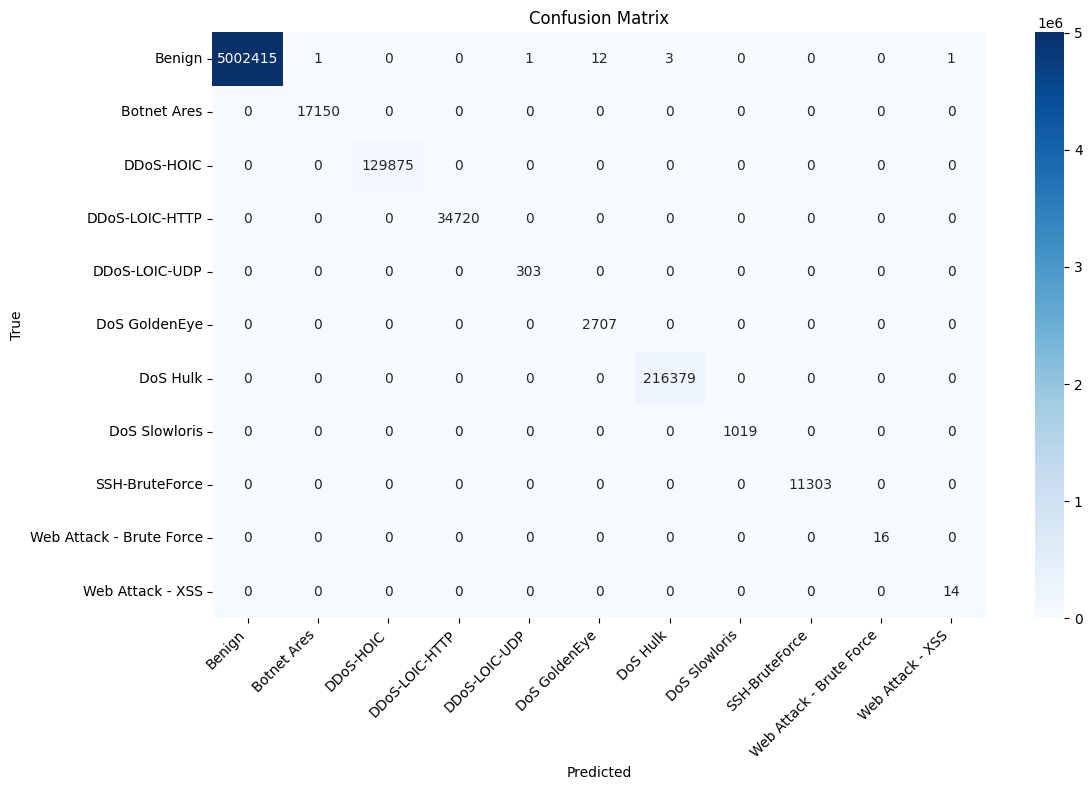

In [40]:
y_pred_numeric = le.transform(y_pred)

# ===== Step 5: Compute and Display the Confusion Matrix =====
# Compute the confusion matrix. You can use either the original string labels
# or the numeric versions as long as they are aligned.
cm = confusion_matrix(test_data["Label"], y_pred, labels=class_names)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

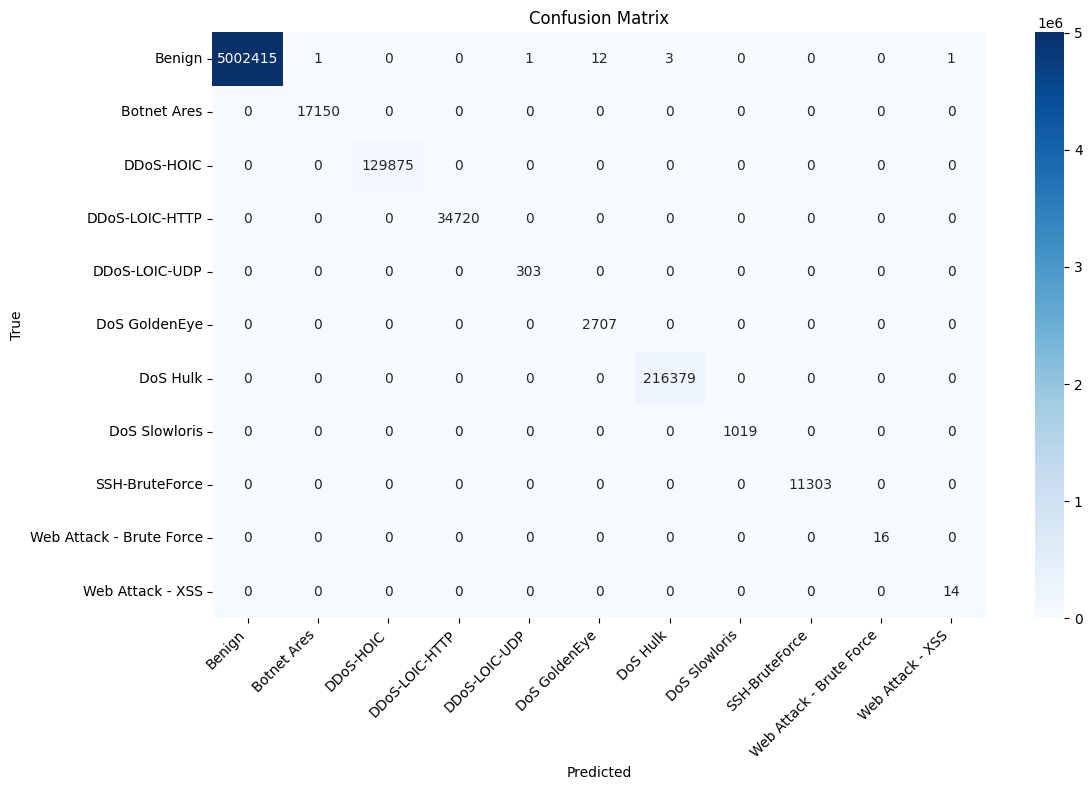

In [40]:
# Confusion Matrix Heatmap
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


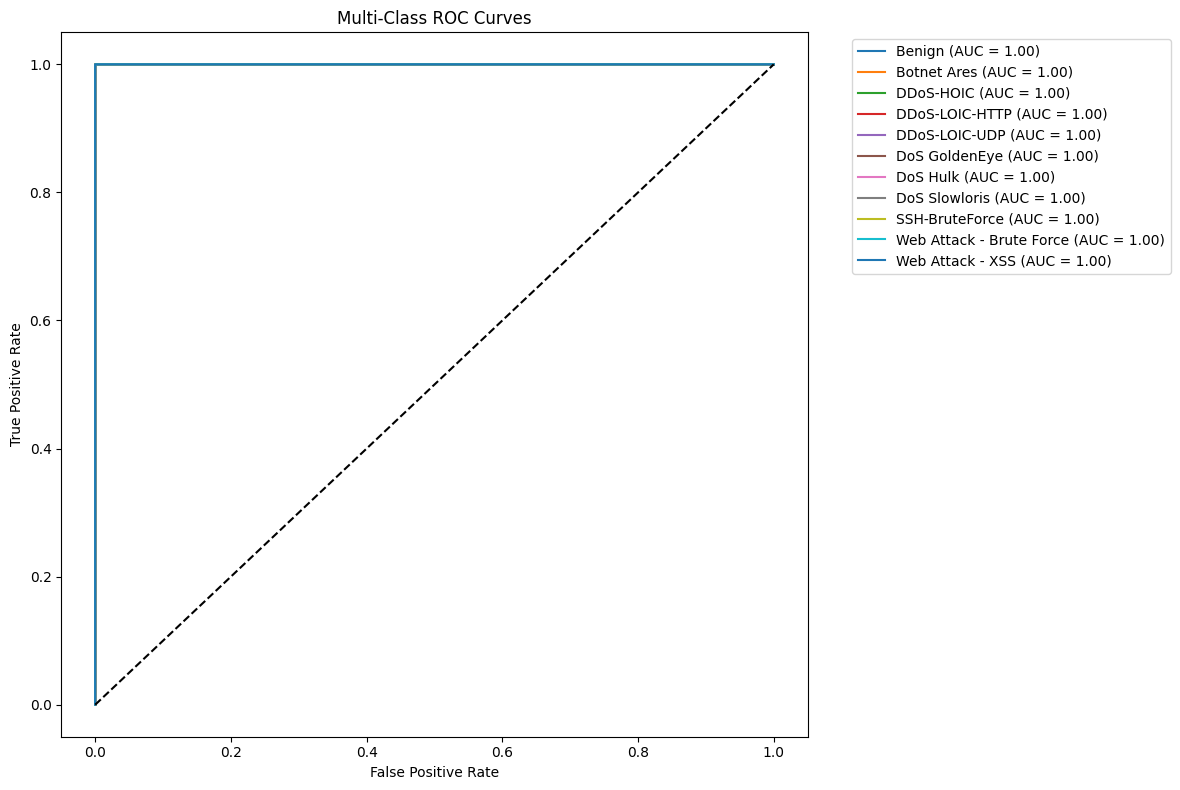

In [41]:
# ===== Step 5: Plot Multi-Class ROC Curves (One-vs-Rest) =====
plt.figure(figsize=(12, 8))
for i in range(num_classes):
    # Create binary labels for class i: 1 when sample belongs to class i, else 0.
    y_true_binary = (y_true == i).astype(int)
    fpr, tpr, _ = roc_curve(y_true_binary, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference.
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


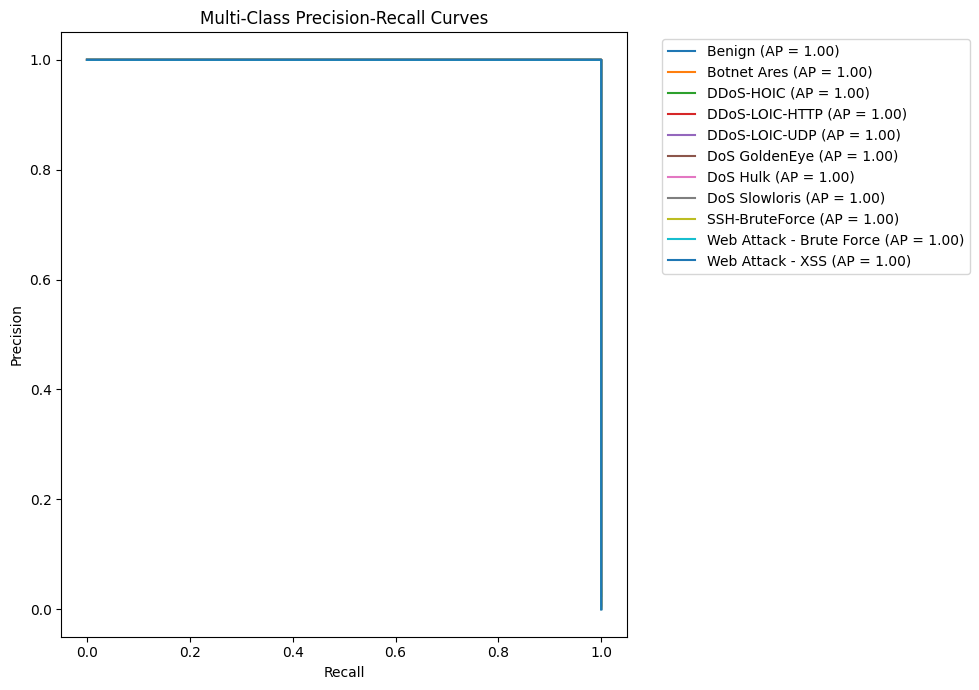

In [42]:
# ===== Plot Multi-Class Precision-Recall Curves (One-vs-Rest) =====
plt.figure(figsize=(10, 7))
for i in range(num_classes):
    y_true_binary = (y_true == i).astype(int)
    precision, recall, _ = precision_recall_curve(y_true_binary, y_prob[:, i])
    avg_precision = average_precision_score(y_true_binary, y_prob[:, i])
    plt.plot(recall, precision, label=f'{class_names[i]} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-Class Precision-Recall Curves')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

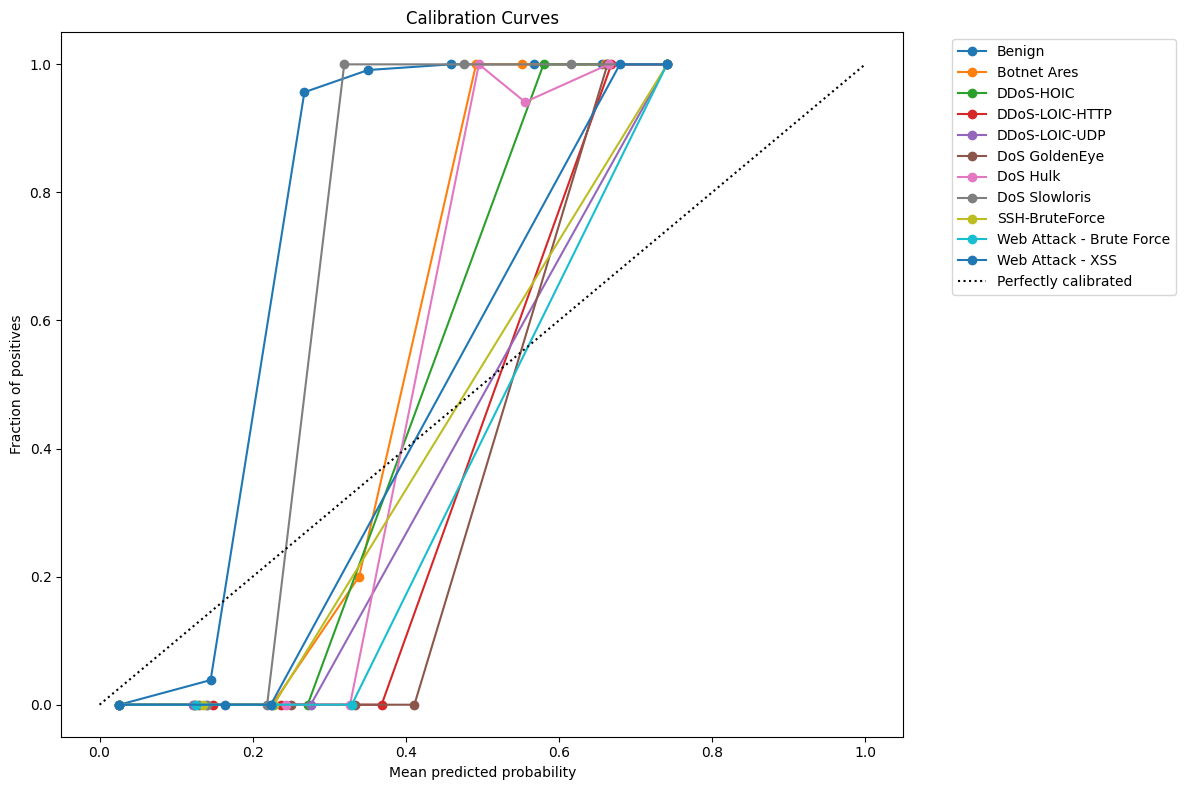

In [43]:
# =============================================================================
# Calibration Curves (One-vs-Rest for Each Class)
# =============================================================================
plt.figure(figsize=(12, 8))
for i in range(num_classes):
    # Create a binary representation for class i.
    y_true_binary = (y_true == i).astype(int)
    prob = y_prob[:, i]
    
    # Compute calibration curve: fraction of positives vs. mean predicted probability.
    prob_true, prob_pred = calibration_curve(y_true_binary, prob, n_bins=10, strategy='uniform')
    plt.plot(prob_pred, prob_true, marker='o', label=f'{class_names[i]}')
    
# Reference line for perfect calibration.
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curves")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Number of correct predictions: 5415901
Total predictions: 5415919


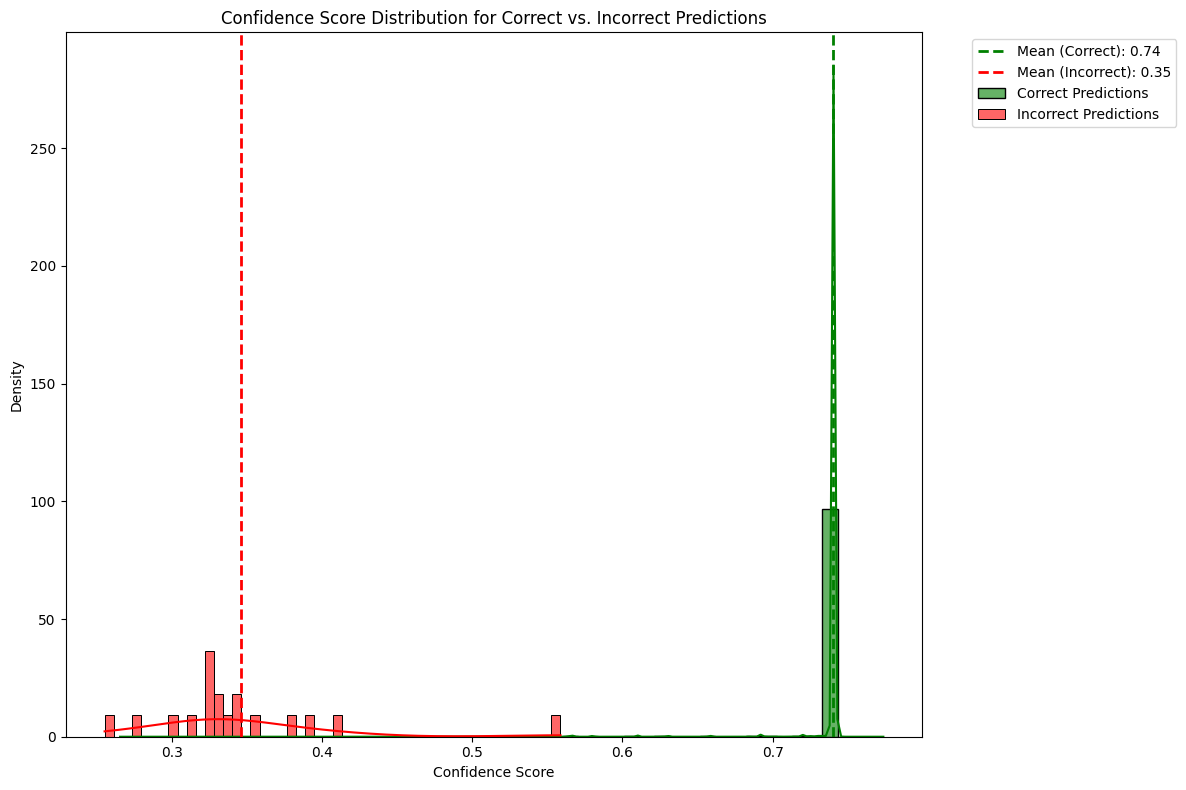

In [44]:
# Transform predicted string labels into numeric labels using the same encoder.
y_preds = le.transform(y_pred)

# ===== Compute Confidence Scores & Correctness =====
# Confidence score: maximum probability in each row.
max_probs = np.max(y_prob, axis=1)

# Create a Boolean array where each position is True if the prediction is correct.
correct = (y_preds == y_true)

# For debugging, print the number of correct predictions.
num_correct = np.sum(correct)
print("Number of correct predictions:", num_correct)
print("Total predictions:", len(y_true))

# Compute the mean confidence score for correct and incorrect predictions
mean_correct = np.mean(max_probs[correct]) if np.any(correct) else 0
mean_incorrect = np.mean(max_probs[~correct]) if np.any(~correct) else 0

# ===== Plot the Confidence Score Distribution =====
plt.figure(figsize=(12, 8))

# Plot histogram with KDE for correct predictions.
sns.histplot(max_probs[correct], bins=50, color='green', alpha=0.6, stat='density',
             kde=True, label='Correct Predictions')
# Plot histogram with KDE for incorrect predictions.
sns.histplot(max_probs[~correct], bins=50, color='red', alpha=0.6, stat='density',
             kde=True, label='Incorrect Predictions')

# Add vertical dashed lines at the mean confidence scores for each group.
plt.axvline(mean_correct, color='green', linestyle='dashed', linewidth=2,
            label=f'Mean (Correct): {mean_correct:.2f}')
plt.axvline(mean_incorrect, color='red', linestyle='dashed', linewidth=2,
            label=f'Mean (Incorrect): {mean_incorrect:.2f}')

# Set the plot title and labels.
plt.xlabel('Confidence Score')
plt.ylabel('Density')
plt.title('Confidence Score Distribution for Correct vs. Incorrect Predictions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

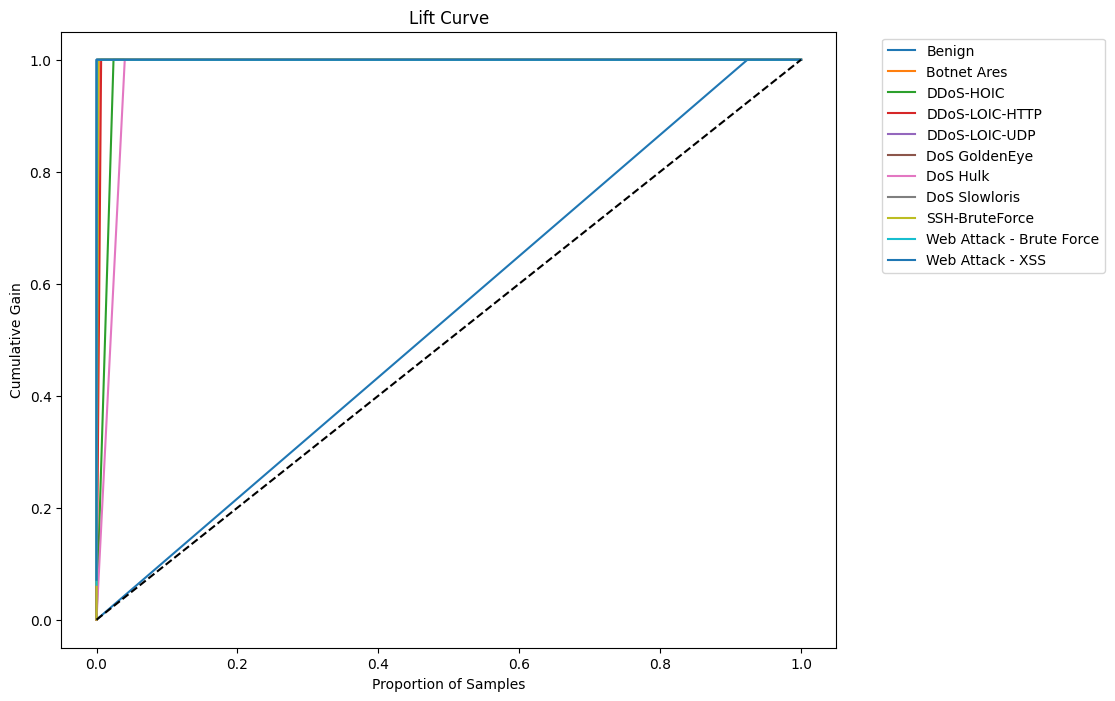

In [45]:
# Lift Curve (Gains Chart)
def plot_lift_curve(y_true, y_prob, class_names):
    """Plot Lift Curve for each class"""
    plt.figure(figsize=(10, 8))
    
    for i in range(num_classes):
        sorted_indices = np.argsort(-y_prob[:, i])  # Sort by descending probability
        cumulative_gains = np.cumsum(y_true[sorted_indices] == i) / np.sum(y_true == i)  # Gains
        
        plt.plot(np.linspace(0, 1, len(cumulative_gains)), cumulative_gains, label=f'{class_names[i]}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Proportion of Samples')
    plt.ylabel('Cumulative Gain')
    plt.title('Lift Curve')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Call the Lift Curve function
plot_lift_curve(y_true, y_prob, class_names)

Text(0.5, 0, 'True Values')

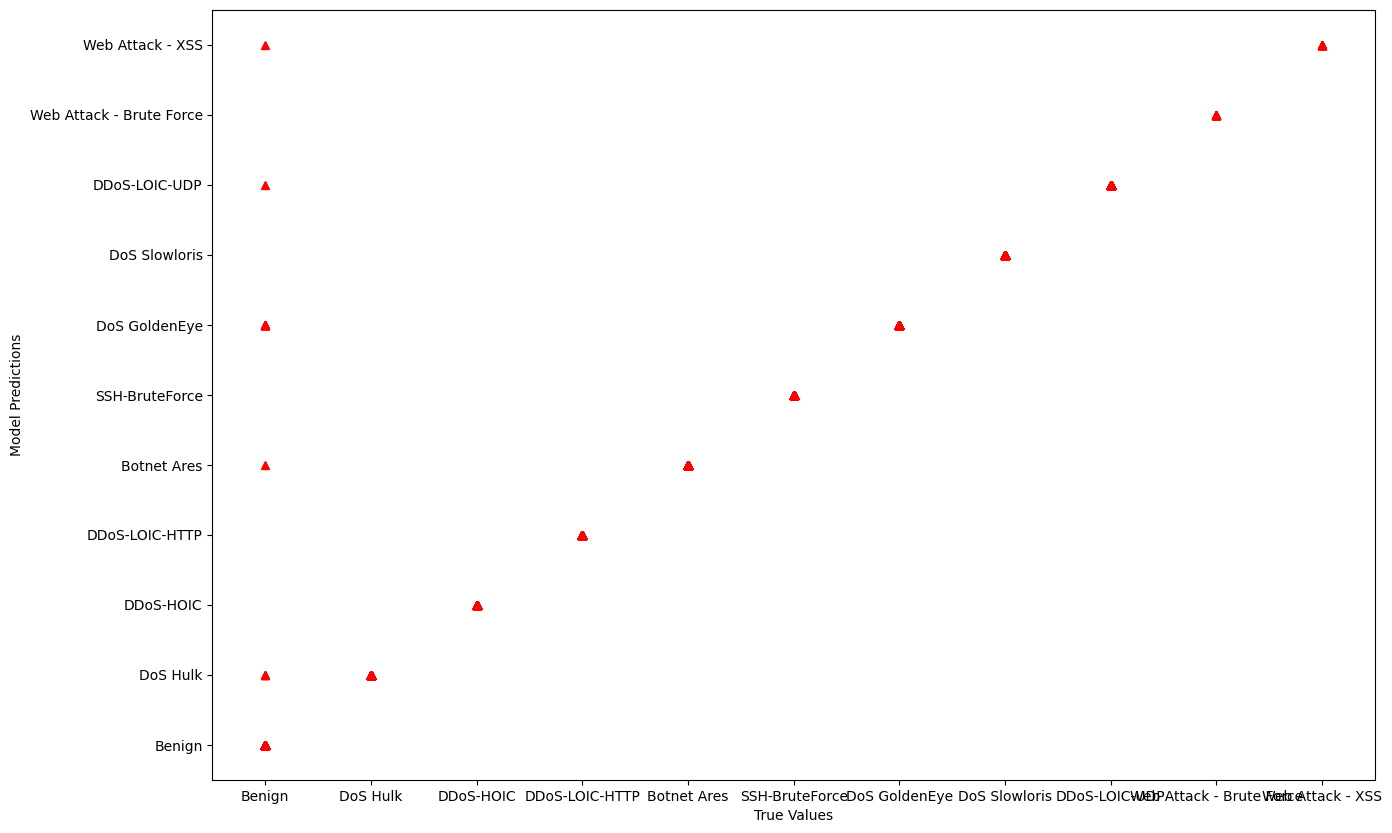

In [46]:

plt.figure(figsize = (15, 10))
plt.plot(y_true, y_pred, "^", color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')


In [51]:
# leaderboard on train data
predictor.leaderboard()

                      model  score_val  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   1.000000      79.017503   2892.286797                0.963080         892.642673            2       True          9
1           CatBoost_BAG_L1   0.999961       1.125142   1817.172830                1.125142        1817.172830            1       True          8
2    NeuralNetFastAI_BAG_L2   0.999866    1722.005031  11551.408084               13.837951        4008.687693            2       True         10
3       WeightedEnsemble_L3   0.999866    1722.976115  12062.915525                0.971084         511.507441            3       True         14
4           LightGBM_BAG_L2   0.999866    1711.073392   7691.269759                2.906312         148.549369            2       True         12
5           CatBoost_BAG_L2   0.999860    1709.640676   7871.149614                1.473596         328.429224            2 

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,1.000000,79.017503,2892.286797,0.963080,892.642673,2,True,9
1,CatBoost_BAG_L1,0.999961,1.125142,1817.172830,1.125142,1817.172830,1,True,8
2,NeuralNetFastAI_BAG_L2,0.999866,1722.005031,11551.408084,13.837951,4008.687693,2,True,10
3,WeightedEnsemble_L3,0.999866,1722.976115,12062.915525,0.971084,511.507441,3,True,14
4,LightGBM_BAG_L2,0.999866,1711.073392,7691.269759,2.906312,148.549369,2,True,12
5,CatBoost_BAG_L2,0.999860,1709.640676,7871.149614,1.473596,328.429224,2,True,13
6,LightGBMXT_BAG_L1,0.999856,1.909791,146.390243,1.909791,146.390243,1,True,4
7,LightGBM_BAG_L1,0.999851,1.446388,106.795729,1.446388,106.795729,1,True,5
8,NeuralNetFastAI_BAG_L1,0.999815,11.140418,5328.463445,11.140418,5328.463445,1,True,3
9,RandomForestEntr_BAG_L1,0.999732,75.479579,59.375608,75.479579,59.375608,1,True,7


In [52]:
# evaluating prediction leadership and best on test data
print("\n Performance Leaderboard:")
leaderboard_test =predictor.leaderboard(test_data, extra_metrics=['accuracy', 'acc', 'balanced_accuracy', 'mcc', 'roc_auc_ovo_macro', 'log_loss', 'nll', 'pac', 'pac_score', 'quadratic_kappa', 'precision_macro', 'precision_micro', 'precision_weighted', 'recall_macro', 'recall_micro', 'recall_weighted', 'f1_macro', 'f1_micro', 'f1_weighted'])
leaderboard_test


 Performance Leaderboard:


Loading: AutogluonModels/ag-20250323_053745/models/KNeighborsUnif_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/KNeighborsDist_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/NeuralNetFastAI_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/LightGBMXT_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/RandomForestGini_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/RandomForestEntr_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/CatBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/WeightedEnsemble_L2/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/NeuralNetFastAI_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/LightGBMXT_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20250323_053745/models/LightGBM_BAG_L2/model.pkl
Loading: AutogluonModels/a

                      model  score_test  accuracy  balanced_accuracy       mcc  roc_auc_ovo_macro  log_loss       pac  quadratic_kappa  precision_macro  precision_micro  precision_weighted  recall_macro  recall_micro  recall_weighted  f1_macro  f1_micro  f1_weighted  score_val  pred_time_test  pred_time_val      fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2    1.000000  0.999997           1.000000  0.999977           1.000000 -0.301375  0.141260         0.999970         0.993233         0.999997            0.999997      1.000000      0.999997         0.999997  0.996511  0.999997     0.999997   1.000000       45.337240      79.017503   2892.286797                 0.689750                0.963080         892.642673            2       True          9
1           LightGBM_BAG_L2    0.999999  0.999995           0.999999  0.999964           1.000000 -0.632102 -0.546281         0.999976         0.995

,model,score_test,accuracy,balanced_accuracy,mcc,roc_auc_ovo_macro,log_loss,pac,quadratic_kappa,precision_macro,...,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,1.000000,0.999997,1.000000,0.999977,1.000000,-0.301375,0.141260,0.999970,0.993233,...,1.000000,45.337240,79.017503,2892.286797,0.689750,0.963080,892.642673,2,True,9
1,LightGBM_BAG_L2,0.999999,0.999995,0.999999,0.999964,1.000000,-0.632102,-0.546281,0.999976,0.995055,...,0.999866,3942.650234,1711.073392,7691.269759,37.945630,2.906312,148.549369,2,True,12
2,CatBoost_BAG_L1,0.999988,0.999928,0.999988,0.999504,1.000000,-0.000771,0.997456,0.999111,0.892154,...,0.999961,11.877770,1.125142,1817.172830,11.877770,1.125142,1817.172830,1,True,8
3,RandomForestGini_BAG_L1,0.999822,0.999999,0.999822,0.999996,1.000000,-0.000051,0.999833,0.999992,1.000000,...,0.999732,15.395627,75.482892,75.675565,15.395627,75.482892,75.675565,1,True,6
4,LightGBMXT_BAG_L1,0.999812,0.999899,0.999812,0.999301,1.000000,-0.649704,-0.576885,0.999030,0.985038,...,0.999856,24.045954,1.909791,146.390243,24.045954,1.909791,146.390243,1,True,4
5,NeuralNetFastAI_BAG_L1,0.999795,0.999966,0.999795,0.999765,1.000000,-0.000234,0.999243,0.999634,0.967181,...,0.999815,212.566680,11.140418,5328.463445,212.566680,11.140418,5328.463445,1,True,3
6,RandomForestEntr_BAG_L1,0.999732,0.999999,0.999732,0.999994,1.000000,-0.000052,0.999828,0.999990,0.999994,...,0.999732,15.253746,75.479579,59.375608,15.253746,75.479579,59.375608,1,True,7
7,NeuralNetFastAI_BAG_L2,0.999732,0.999996,0.999732,0.999976,1.000000,-0.000028,0.999909,0.999967,0.999569,...,0.999866,4160.810216,1722.005031,11551.408084,256.105612,13.837951,4008.687693,2,True,10
8,WeightedEnsemble_L3,0.999732,0.999996,0.999732,0.999976,1.000000,-0.000028,0.999909,0.999967,0.999569,...,0.999866,4161.060623,1722.976115,12062.915525,0.250408,0.971084,511.507441,3,True,14
9,LightGBM_BAG_L1,0.999714,0.999947,0.999714,0.999633,1.000000,-0.735660,-0.718836,0.999156,0.896836,...,0.999851,17.374093,1.446388,106.795729,17.374093,1.446388,106.795729,1,True,5


                      model  score_val  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   1.000000      79.017503   2892.286797                0.963080         892.642673            2       True          9
1           CatBoost_BAG_L1   0.999961       1.125142   1817.172830                1.125142        1817.172830            1       True          8
2    NeuralNetFastAI_BAG_L2   0.999866    1722.005031  11551.408084               13.837951        4008.687693            2       True         10
3       WeightedEnsemble_L3   0.999866    1722.976115  12062.915525                0.971084         511.507441            3       True         14
4           LightGBM_BAG_L2   0.999866    1711.073392   7691.269759                2.906312         148.549369            2       True         12
5           CatBoost_BAG_L2   0.999860    1709.640676   7871.149614                1.473596         328.429224            2 

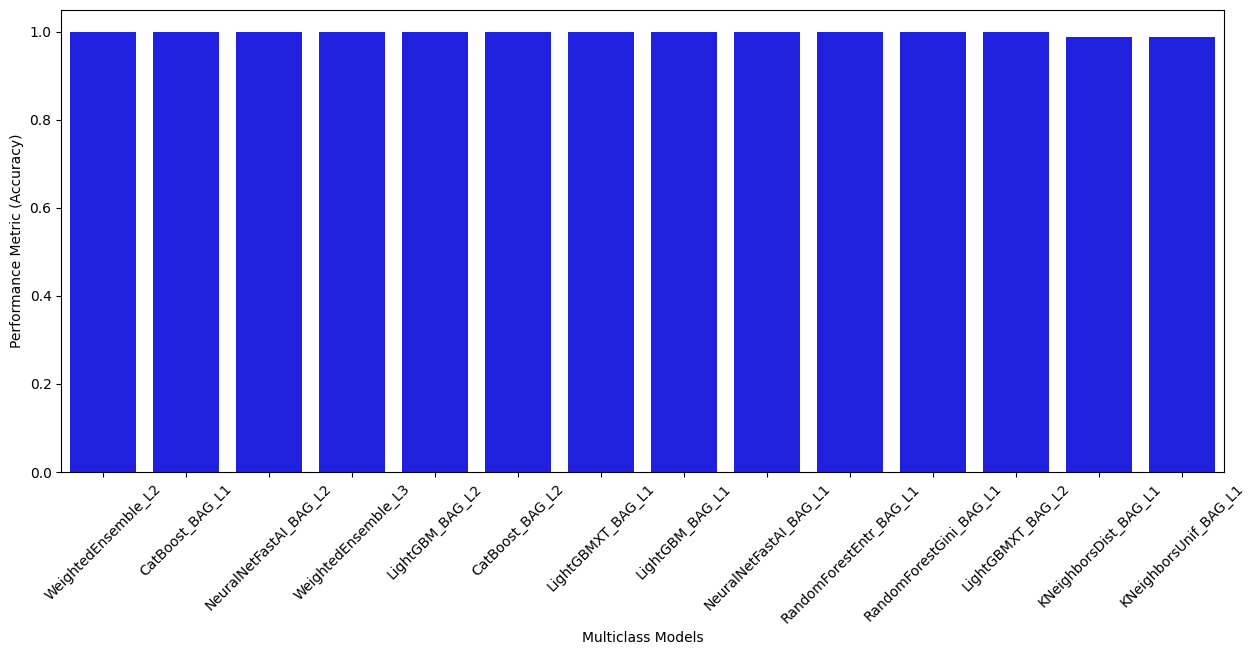

In [53]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (Accuracy)", xlabel = "Multiclass Models")
plt.xticks(rotation = 45);

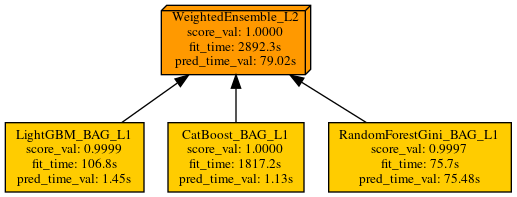

In [54]:
path_to_png = predictor.plot_ensemble_model()

from IPython.display import Image, display
display(Image(filename=path_to_png))

In [ ]:
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(test_data), color = "b")
ax.set(ylabel = "Performance Metric (Accuracy)", xlabel = "Multiclass Models")
plt.xticks(rotation = 45);

Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsUnif_BAG_L1/model.pkl


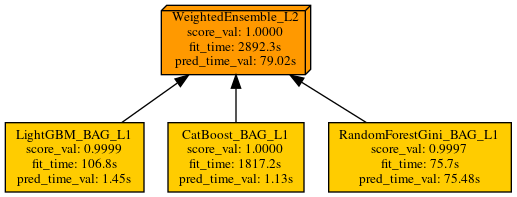

In [58]:
path_to_png = predictor.plot_ensemble_model()

from IPython.display import Image, display
display(Image(filename=path_to_png))

In [46]:
y_pred_proba.to_csv(f"s3://final-praxis/automl-output/final-project/inference-results/output/subset-2/autogluon/y_pred_probadf.csv", index=False)

In [47]:
y_pred.to_csv(f"s3://final-praxis/automl-output/final-project/inference-results/output/subset-2/autogluon/y_pred.csv", index=False)

In [5]:
validation_data.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
0,6,117060497,35,29,2552,6419,405,0,72.914286,83.162977,...,374939.000000,420152.949886,672032,77846,5.811635e+07,232072.445585,58280453,57952253,117060497,Benign
1,6,117268395,16,18,1005,5592,362,0,62.812500,101.487746,...,327000.000000,241901.229844,498050,155950,5.822920e+07,370398.088335,58491106,57967284,117268395,Benign
2,6,61394552,15,14,667,3391,333,0,44.466667,99.398093,...,211008.666667,346886.613892,919088,69357,1.000984e+07,37887.430890,10031069,9936831,61394552,Benign
3,6,5117283,9,8,1308,2364,436,0,145.333333,218.000000,...,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,5117283,Benign
4,6,1700526,8,7,1144,1581,677,0,143.000000,227.969923,...,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,1700526,Benign


In [6]:
predictor = TabularPredictor.load("AutogluonModels/ag-20250323_053745/")

In [7]:
# evaluating prediction leadership and best on test data
print("\n Performance Leaderboard:")
leaderboard_val =predictor.leaderboard(validation_data, extra_metrics=['accuracy', 'acc', 'balanced_accuracy', 'mcc', 'roc_auc_ovo_macro', 'log_loss', 'nll', 'pac', 'pac_score', 'quadratic_kappa', 'precision_macro', 'precision_micro', 'precision_weighted', 'recall_macro', 'recall_micro', 'recall_weighted', 'f1_macro', 'f1_micro', 'f1_weighted'])
leaderboard_val


 Performance Leaderboard:
                      model  score_test  accuracy  balanced_accuracy       mcc  roc_auc_ovo_macro  log_loss       pac  quadratic_kappa  precision_macro  precision_micro  precision_weighted  recall_macro  recall_micro  recall_weighted  f1_macro  f1_micro  f1_weighted  score_val  pred_time_test  pred_time_val      fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2    1.000000  0.999997           1.000000  0.999981           1.000000 -0.301364  0.141286         0.999980         0.998368         0.999997            0.999997      1.000000      0.999997         0.999997  0.999179  0.999997     0.999997   1.000000       75.923069      79.017503   2892.286797                 0.458390                0.963080         892.642673            2       True          9
1           CatBoost_BAG_L1    0.999961  0.999929           0.999961  0.999506           1.000000 -0.000779  0.997429    

,model,score_test,accuracy,balanced_accuracy,mcc,roc_auc_ovo_macro,log_loss,pac,quadratic_kappa,precision_macro,...,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,1.000000,0.999997,1.000000,0.999981,1.000000,-0.301364,0.141286,0.999980,0.998368,...,1.000000,75.923069,79.017503,2892.286797,0.458390,0.963080,892.642673,2,True,9
1,CatBoost_BAG_L1,0.999961,0.999929,0.999961,0.999506,1.000000,-0.000779,0.997429,0.999091,0.887182,...,0.999961,50.040159,1.125142,1817.172830,50.040159,1.125142,1817.172830,1,True,8
2,NeuralNetFastAI_BAG_L2,0.999866,0.999996,0.999866,0.999975,1.000000,-0.000026,0.999915,0.999976,0.998267,...,0.999866,3113.214568,1722.005031,11551.408084,174.264058,13.837951,4008.687693,2,True,10
3,WeightedEnsemble_L3,0.999866,0.999996,0.999866,0.999975,1.000000,-0.000026,0.999915,0.999976,0.998267,...,0.999866,3113.350567,1722.976115,12062.915525,0.135999,0.971084,511.507441,3,True,14
4,LightGBM_BAG_L2,0.999866,0.999994,0.999866,0.999958,1.000000,-0.632103,-0.546288,0.999962,0.983463,...,0.999866,2966.144063,1711.073392,7691.269759,27.193553,2.906312,148.549369,2,True,12
5,CatBoost_BAG_L2,0.999860,0.999947,0.999860,0.999634,1.000000,-0.295935,0.154576,0.999318,0.895406,...,0.999860,2988.672553,1709.640676,7871.149614,49.722044,1.473596,328.429224,2,True,13
6,LightGBMXT_BAG_L1,0.999856,0.999899,0.999856,0.999306,1.000000,-0.649695,-0.576875,0.999016,0.986424,...,0.999856,17.589385,1.909791,146.390243,17.589385,1.909791,146.390243,1,True,4
7,LightGBM_BAG_L1,0.999851,0.999947,0.999851,0.999634,1.000000,-0.735599,-0.718745,0.999129,0.898577,...,0.999851,12.940737,1.446388,106.795729,12.940737,1.446388,106.795729,1,True,5
8,NeuralNetFastAI_BAG_L1,0.999815,0.999966,0.999815,0.999763,1.000000,-0.000232,0.999236,0.999662,0.949610,...,0.999815,150.173878,11.140418,5328.463445,150.173878,11.140418,5328.463445,1,True,3
9,RandomForestGini_BAG_L1,0.999732,0.999999,0.999732,0.999994,1.000000,-0.000051,0.999832,0.999990,0.999552,...,0.999732,12.483782,75.482892,75.675565,12.483782,75.482892,75.675565,1,True,6


## Computing Additional Metrics

In [8]:
y_pred = pd.read_csv(f"s3://final-praxis/automl-output/final-project/inference-results/output/subset-2/autogluon/y_pred.csv")

In [9]:
y_pred_proba = pd.read_csv(f"s3://final-praxis/automl-output/final-project/inference-results/output/subset-2/autogluon/y_pred_probadf.csv", header=0)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, average_precision_score,
    precision_recall_fscore_support, log_loss, brier_score_loss,
    balanced_accuracy_score
)
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import LabelEncoder

In [11]:
# Log Loss calculation
logloss = log_loss(y_true, y_pred_proba)
print(f"Log Loss: {logloss:.7f}")

Log Loss: 0.3013755


In [12]:
# Matthews Correlation Coefficient (MCC) calculation
mcc = matthews_corrcoef(y_true, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.7f}")

Matthews Correlation Coefficient (MCC): 0.9999770


In [13]:
# Compute micro-averaged F1 score
f1_micro = f1_score(y_true, y_pred, average='micro')
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')
print(f"Micro-averaged F1 score: {f1_micro:.7f}")
print(f"F1 Macro: {f1_macro:.7f}")
print(f"F1 Weighted: {f1_weighted:.7f}")

Micro-averaged F1 score: 0.9999967
F1 Macro: 0.9965109
F1 Weighted: 0.9999967


In [14]:
# Compute Recall metrics
recall_micro = recall_score(y_true, y_pred, average='micro')
recall_macro = recall_score(y_true, y_pred, average='macro')
recall_weighted = recall_score(y_true, y_pred, average='weighted')

print(f"Recall Micro: {recall_micro:.7f}")
print(f"Recall Macro: {recall_macro:.7f}")
print(f"Recall Weighted: {recall_weighted:.7f}")

Recall Micro: 0.9999967
Recall Macro: 0.9999997
Recall Weighted: 0.9999967


In [16]:
# Compute AUC Scores
auc_micro = roc_auc_score(y_true, y_pred_proba, average='micro', multi_class='ovr')
auc_macro = roc_auc_score(y_true, y_pred_proba, average='macro', multi_class='ovr')
auc_weighted = roc_auc_score(y_true, y_pred_proba, average='weighted', multi_class='ovr')

print(f"AUC Micro: {auc_micro:.7f}")
print(f"AUC Macro: {auc_macro:.7f}")
print(f"AUC Weighted: {auc_weighted:.7f}")

AUC Micro: 1.0000000
AUC Macro: 1.0000000
AUC Weighted: 1.0000000


In [17]:
# Compute metrics
precision_micro = precision_score(y_true, y_pred, average='micro')
precision_macro = precision_score(y_true, y_pred, average='macro')
precision_weighted = precision_score(y_true, y_pred, average='weighted')

# Output results
print(f"Precision Micro: {precision_micro:.7f}")
print(f"Precision Macro: {precision_macro:.7f}")
print(f"Precision Weighted: {precision_weighted:.7f}")

Precision Micro: 0.9999967
Precision Macro: 0.9932326
Precision Weighted: 0.9999967
